In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
df = pd.read_csv('who_life_exp.csv')
df.head()

country country_code  region  year  life_expect  life_exp60  \
0  Angola          AGO  Africa  2000     47.33730    14.73400   
1  Angola          AGO  Africa  2001     48.19789    14.95963   
2  Angola          AGO  Africa  2002     49.42569    15.20010   
3  Angola          AGO  Africa  2003     50.50266    15.39144   
4  Angola          AGO  Africa  2004     51.52863    15.56860   

   adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp    une_pop  \
0         383.5583     0.137985    0.025695  1.47439  ...  1.90860  16395.473   
1         372.3876     0.133675    0.024500  1.94025  ...  4.48352  16945.753   
2         354.5147     0.128320    0.023260  2.07512  ...  3.32946  17519.417   
3         343.2169     0.122040    0.021925  2.20275  ...  3.54797  18121.479   
4         333.8711     0.115700    0.020545  2.41274  ...  3.96720  18758.145   

   une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
0       122.2    46.522      1.0   2530.0         32.3        2.60753   
1       118.9    47.059      1.1   2630.0          NaN            NaN   
2       115.1    47.702      1.2   3180.0          NaN            NaN   
3       110.8    48.440      1.3   3260.0          NaN            NaN   
4       106.2    49.263      1.3   3560.0          NaN            NaN   

   une_literacy  une_school  
0           NaN         NaN  
1      67.40542         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 32 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [5]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop hostpital column because there is 96% of missing values in that column.
We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of the variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [6]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hostpital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [7]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [8]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

adult_mortality  infant_mort  age1-4mort
0         383.5583     0.137985    0.025695
1         372.3876     0.133675    0.024500
2         354.5147     0.128320    0.023260
3         343.2169     0.122040    0.021925
4         333.8711     0.115700    0.020545

The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [9]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val

In [10]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)

In [11]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [12]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Serbia          6
Montenegro      6
Canada          5
Afghanistan     5
Name: country, dtype: int64

In [13]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

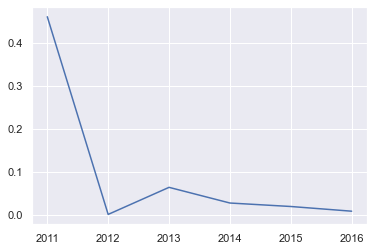

In [14]:
plt.plot('year', 'alcohol', data = sudan_df)

In [15]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

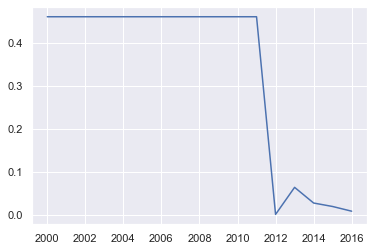

In [16]:
plt.plot('year', 'alcohol', data = sudan_df)

In [17]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [18]:
sudan_df.bfill(inplace = True)

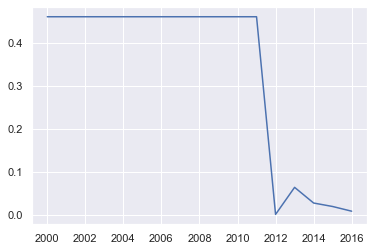

In [19]:
plt.plot('year', 'alcohol', data = sudan_df)

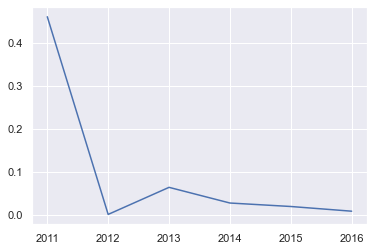

In [20]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [21]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

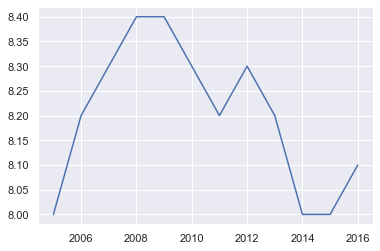

In [22]:
plt.plot('year', 'alcohol', data = canada_df)

In [23]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

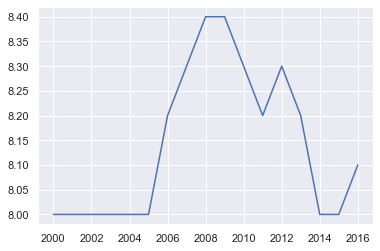

In [24]:
plt.plot('year', 'alcohol', data = canada_df)

In [25]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [26]:
canada_df.ffill(inplace = True)

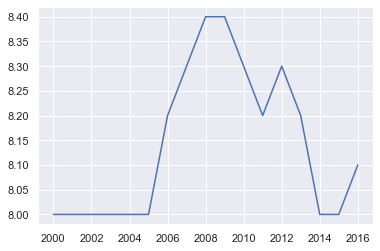

In [27]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

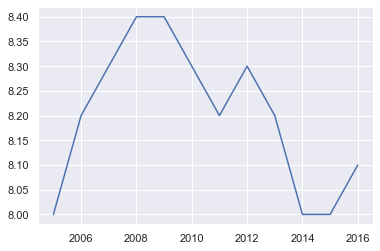

In [28]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

In [29]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])

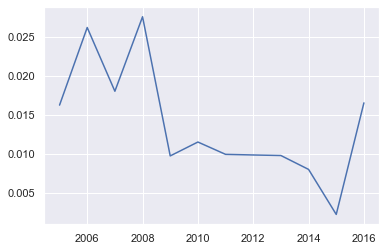

In [30]:
plt.plot('year', 'alcohol', data = afg_df)

In [31]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

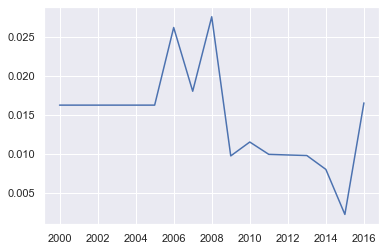

In [32]:
plt.plot('year', 'alcohol', data = afg_df)

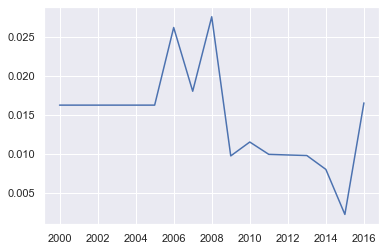

In [33]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

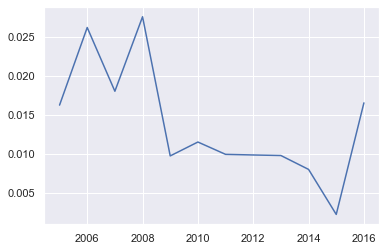

In [34]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [35]:
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [36]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_18748/3723828569.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [37]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [38]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [39]:
df[df['bmi'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [40]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [41]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [42]:
null_df = pd.DataFrame(df[df['hepatitis'].isna()]['country'].value_counts())
pd.set_option('display.max_rows',null_df.shape[0]+1)
print(null_df)


                                                    country
Slovenia                                                 17
United Kingdom of Great Britain and Northern Ir...       17
Switzerland                                              17
Japan                                                    17
Finland                                                  17
Iceland                                                  17
Hungary                                                  17
Norway                                                   17
Denmark                                                  17
South Sudan                                              15
Equatorial Guinea                                        14
Somalia                                                  13
Haiti                                                    13
Netherlands                                              11
Sweden                                                   11
Namibia                                 

In [43]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

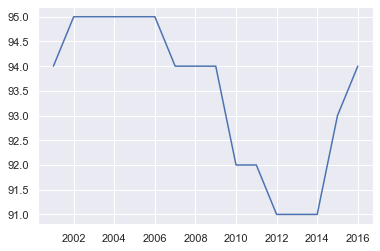

In [44]:
plt.plot('year', 'hepatitis', data = aus_df)

In [45]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

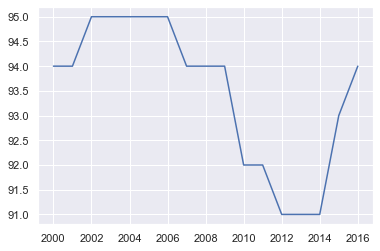

In [46]:
plt.plot('year', 'hepatitis', data = aus_df)

In [47]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

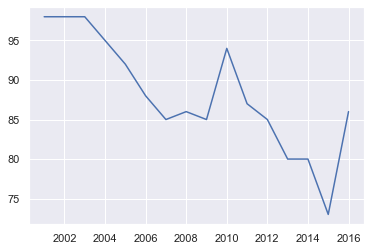

In [48]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [49]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

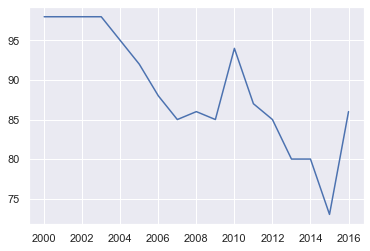

In [50]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [51]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [52]:
for country in countries:
    fill_na('hepatitis', country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_18748/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [53]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [54]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [55]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_18748/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [56]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# Exploratory Analysis

In [57]:
df.dtypes



country              object
region               object
year                  int64
life_expect         float64
life_exp60          float64
adult_mort_rate     float64
infant_mort_rate    float64
age1-4_mort_rate    float64
alcohol             float64
bmi                 float64
age5-19thinness     float64
age5-19obesity      float64
hepatitis           float64
measles             float64
polio               float64
diphtheria          float64
basic_water         float64
doctors             float64
gni_capita          float64
gghe-d              float64
che_gdp             float64
une_pop             float64
une_hiv             float64
dtype: object

# Outliers


In [58]:
df.shape

(3111, 23)

creating a copy of cleaned data frame

In [59]:
new_df = pd.DataFrame(df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3111 non-null   object 
 1   region            3111 non-null   object 
 2   year              3111 non-null   int64  
 3   life_expect       3111 non-null   float64
 4   life_exp60        3111 non-null   float64
 5   adult_mort_rate   3111 non-null   float64
 6   infant_mort_rate  3111 non-null   float64
 7   age1-4_mort_rate  3111 non-null   float64
 8   alcohol           3083 non-null   float64
 9   bmi               3077 non-null   float64
 10  age5-19thinness   3077 non-null   float64
 11  age5-19obesity    3077 non-null   float64
 12  hepatitis         2881 non-null   float64
 13  measles           3100 non-null   float64
 14  polio             3100 non-null   float64
 15  diphtheria        3100 non-null   float64
 16  basic_water       3100 non-null   float64


Dropping the colums that have no missing values to check the outliers of those features that have missing values. This is done to determine whether to drop those rows with missing values. We dropped 8 columns.

In [60]:

varwithna = new_df.drop(labels = ['country','region','adult_mort_rate','infant_mort_rate','age1-4_mort_rate','year','life_expect','life_exp60'],axis =1)

In [61]:
varwithna

alcohol   bmi  age5-19thinness  age5-19obesity  hepatitis  measles  \
0     1.47439  21.7             11.0             0.5       43.0     32.0   
1     1.94025  21.8             10.9             0.5       43.0     60.0   
2     2.07512  21.9             10.7             0.6       43.0     59.0   
3     2.20275  22.0             10.5             0.7       43.0     44.0   
4     2.41274  22.2             10.3             0.8       43.0     43.0   
...       ...   ...              ...             ...        ...      ...   
3106  6.29833  22.4              9.2             3.1       79.0     72.0   
3107  6.42186  22.6              9.1             3.5       87.0     82.0   
3108  6.64447  22.7              9.0             3.8       88.0     87.0   
3109  6.83826  22.8              8.9             4.2       81.0     83.0   
3110  7.11148  22.9              8.9             4.7       66.0     66.0   

      polio  diphtheria  basic_water  doctors  gni_capita   gghe-d  che_gdp  \
0      21.0        31.0     41.14431      NaN      2190.0  1.11099  1.90860   
1      28.0        42.0     42.25467      NaN      2290.0  2.04631  4.48352   
2      22.0        47.0     43.37680      NaN      2690.0  1.30863  3.32946   
3      21.0        46.0     44.36387      NaN      2820.0  1.46560  3.54797   
4      18.0        47.0     45.35134    0.621      3080.0  1.68663  3.96720   
...     ...         ...          ...      ...         ...      ...      ...   
3106   78.0        79.0     72.07056    1.800      4170.0  0.43670  2.07638   
3107   86.0        87.0     74.05544    4.493      4570.0  0.71266  2.39985   
3108   88.0        88.0     76.02924    4.949      4570.0  0.68373  2.29846   
3109   80.0        81.0     77.99142    4.949      4570.0  0.86391  2.45366   
3110   66.0        66.0     79.94190    4.949      4570.0  0.76495  2.36087   

        une_pop  une_hiv  
0     16395.473      1.0  
1     16945.753      1.1  
2     17519.417      1.2  
3     18121.479      1.3  
4     18758.145      1.3  
...         ...      ...  
3106   6444.530      0.3  
3107   6541.304      0.3  
3108   6639.756      0.3  
3109   6741.164      0.3  
3110   6845.846      0.3  

[3111 rows x 15 columns]

In [62]:
varwithna.shape

(3111, 15)

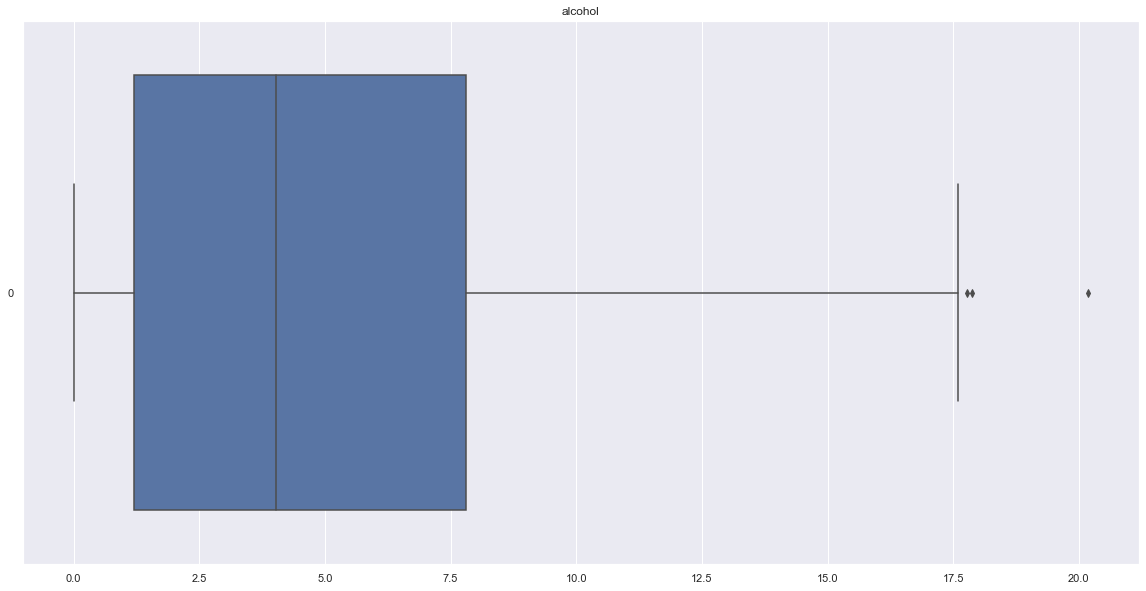

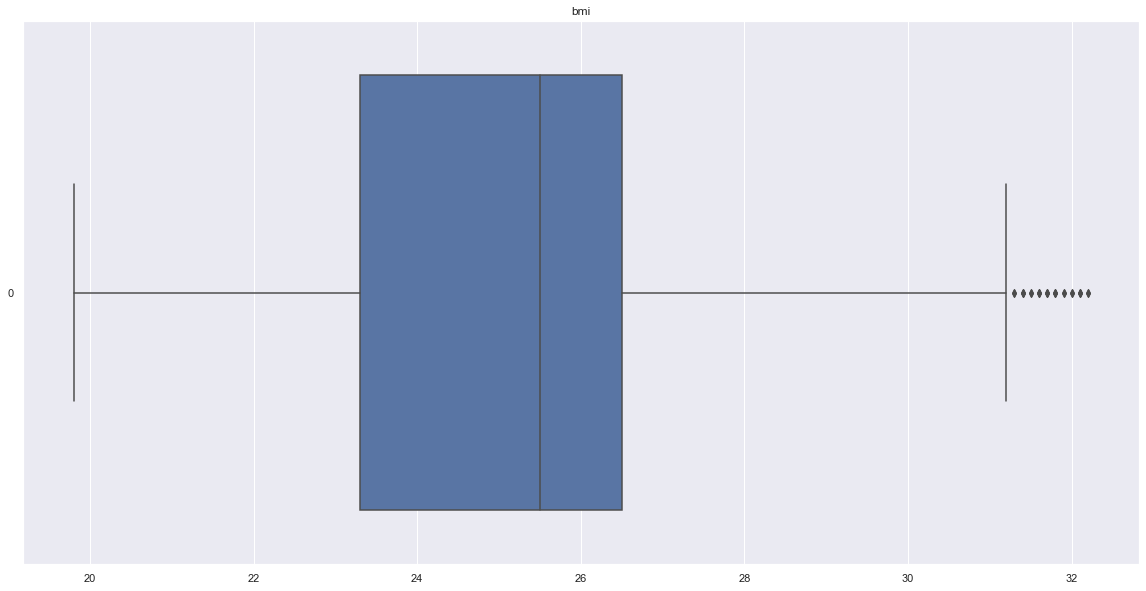

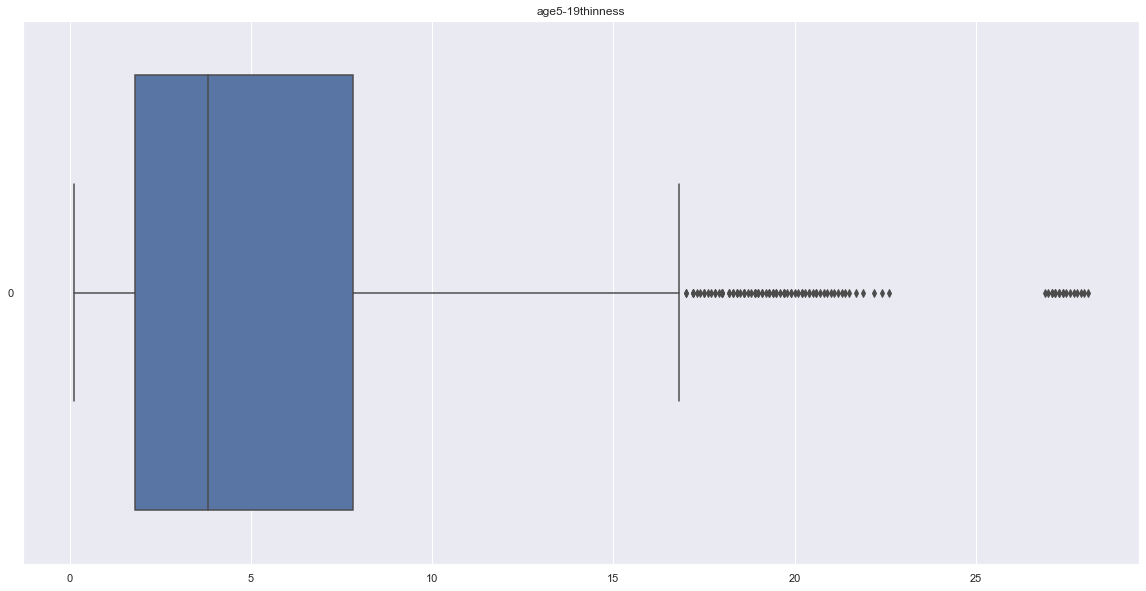

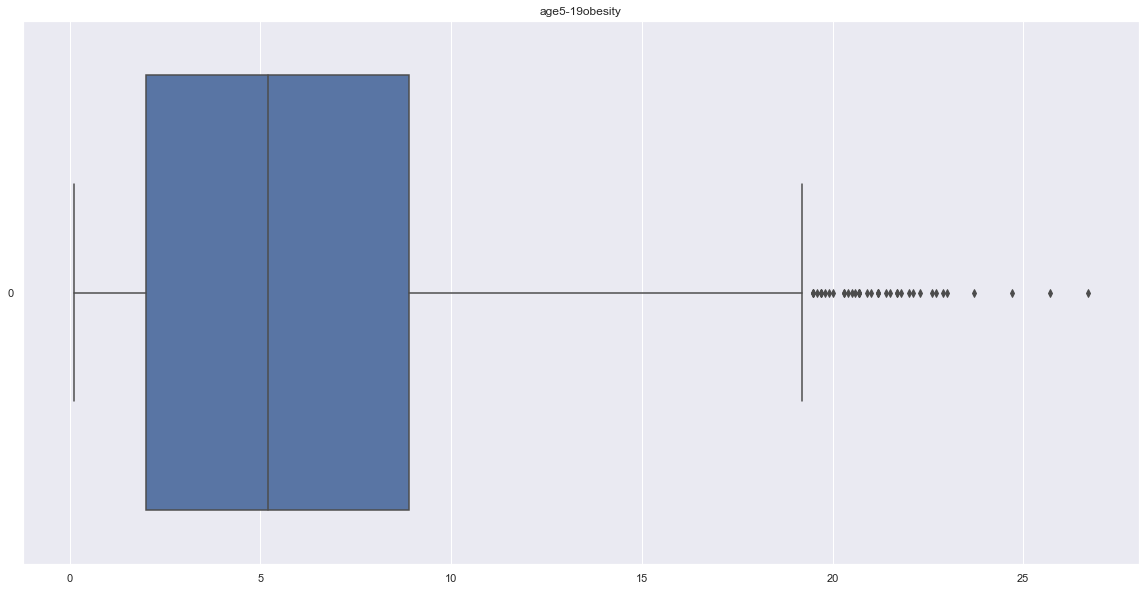

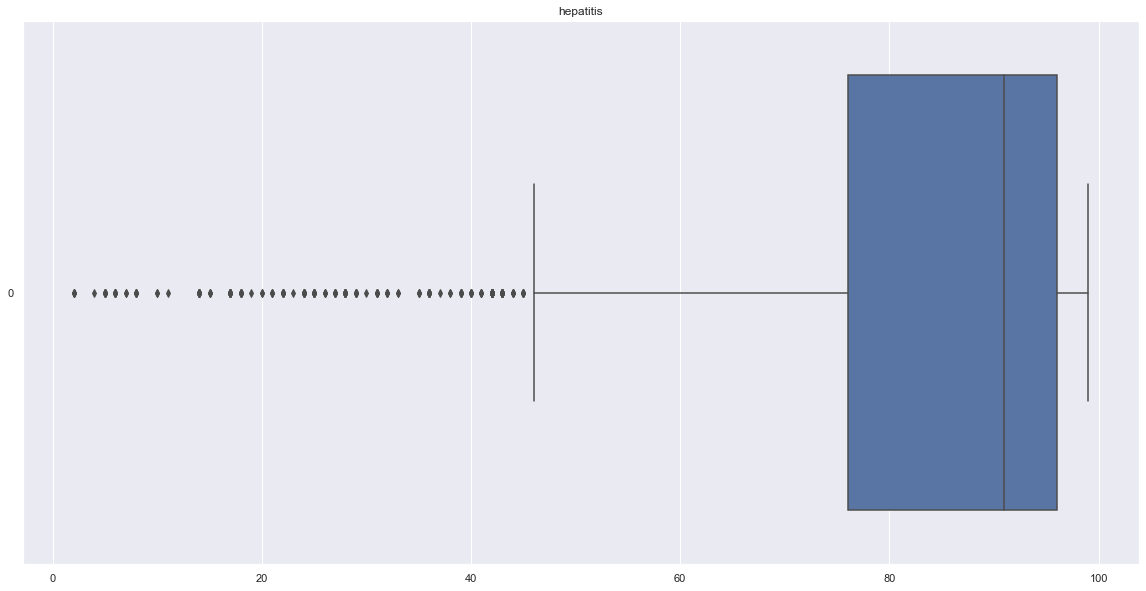

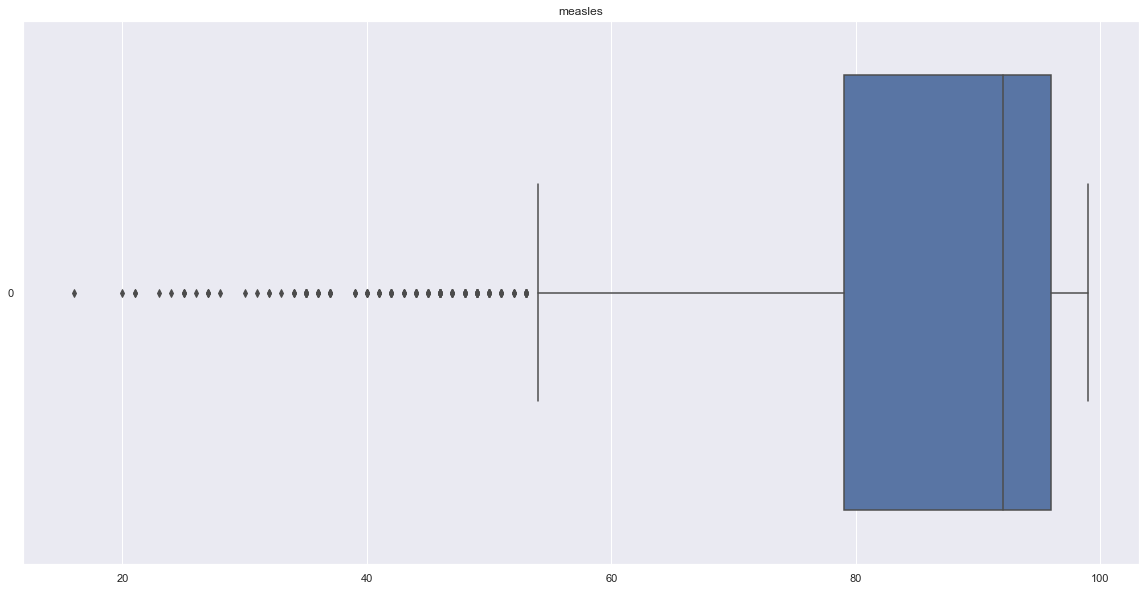

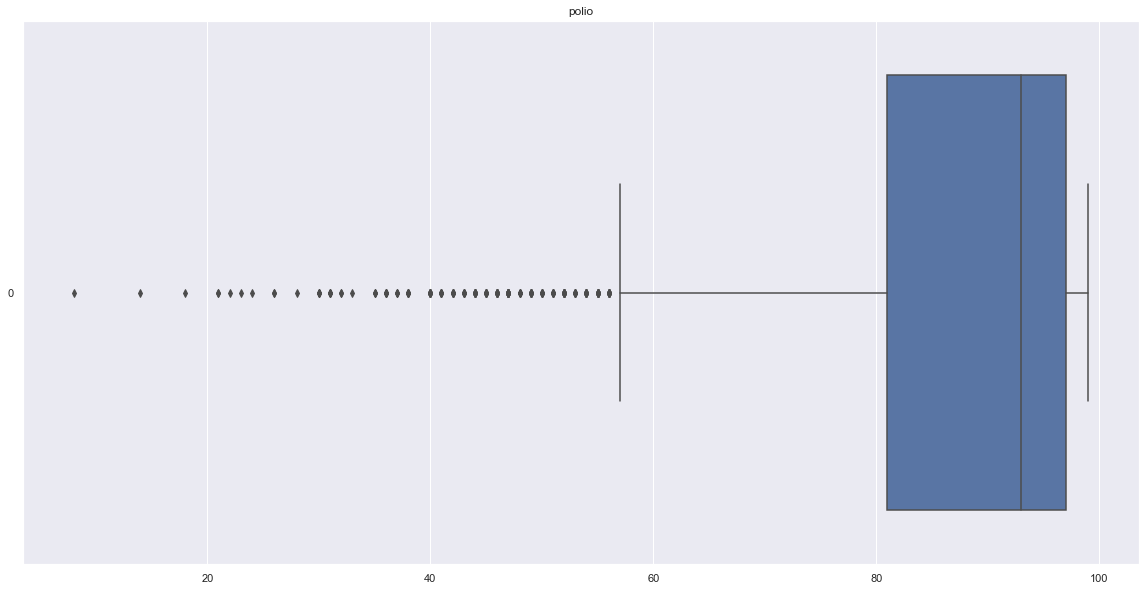

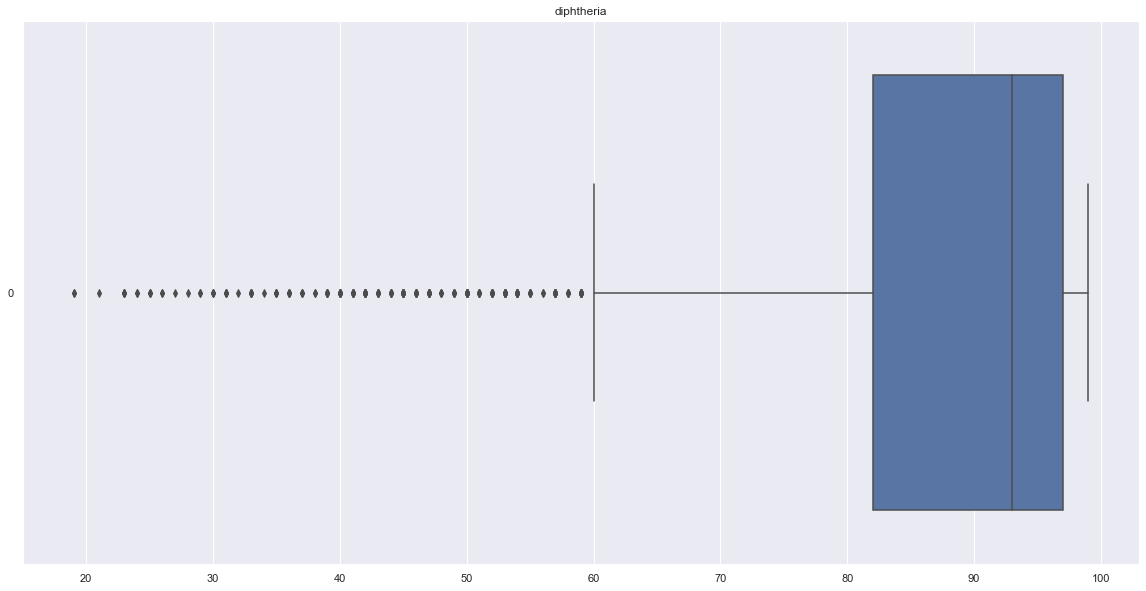

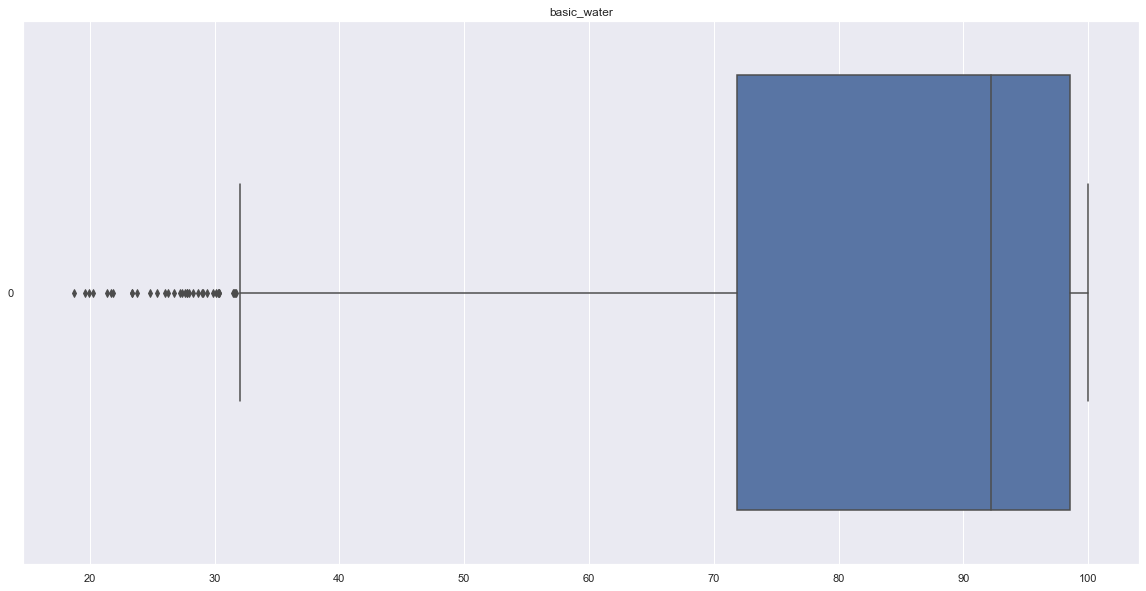

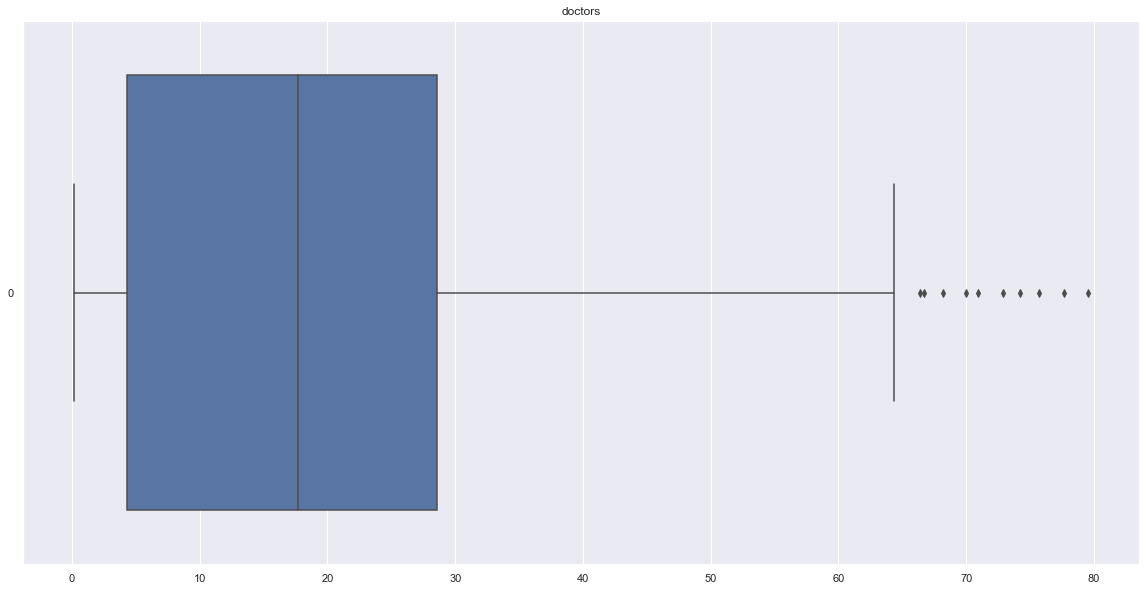

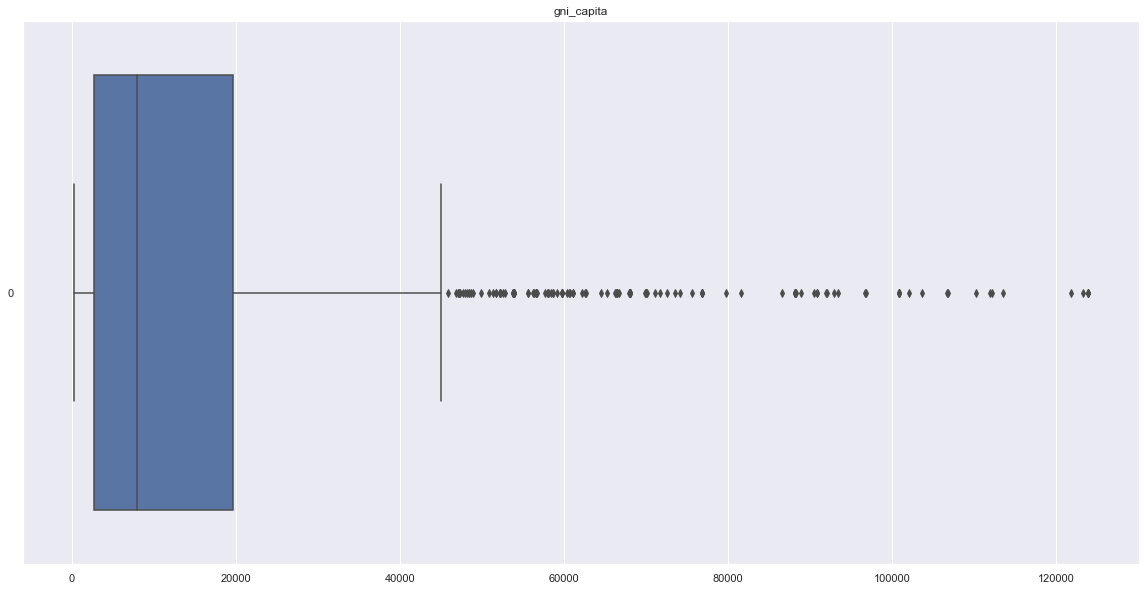

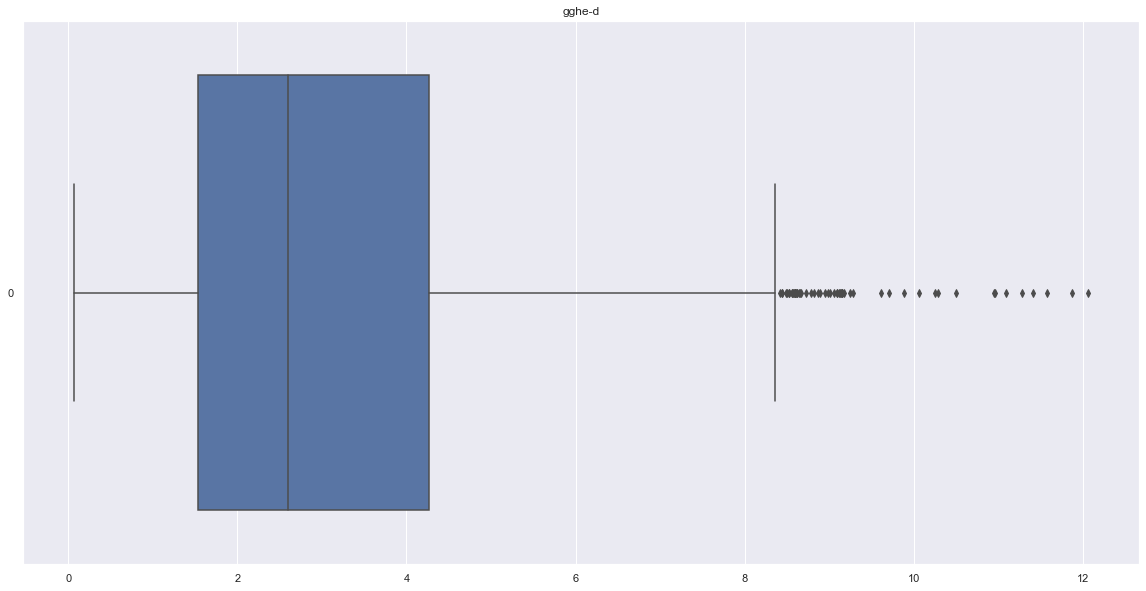

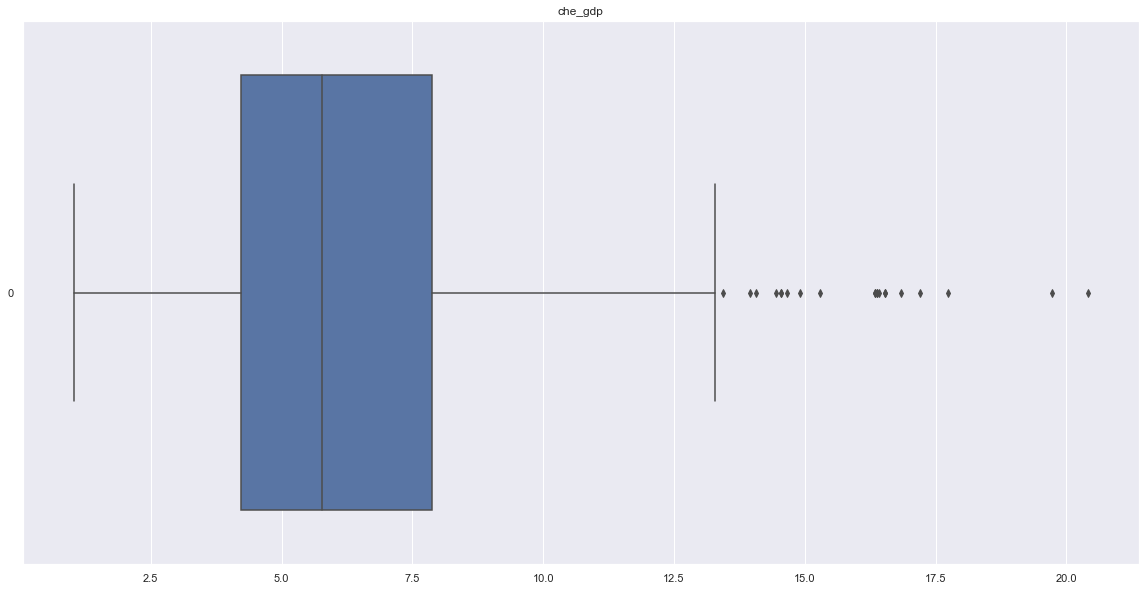

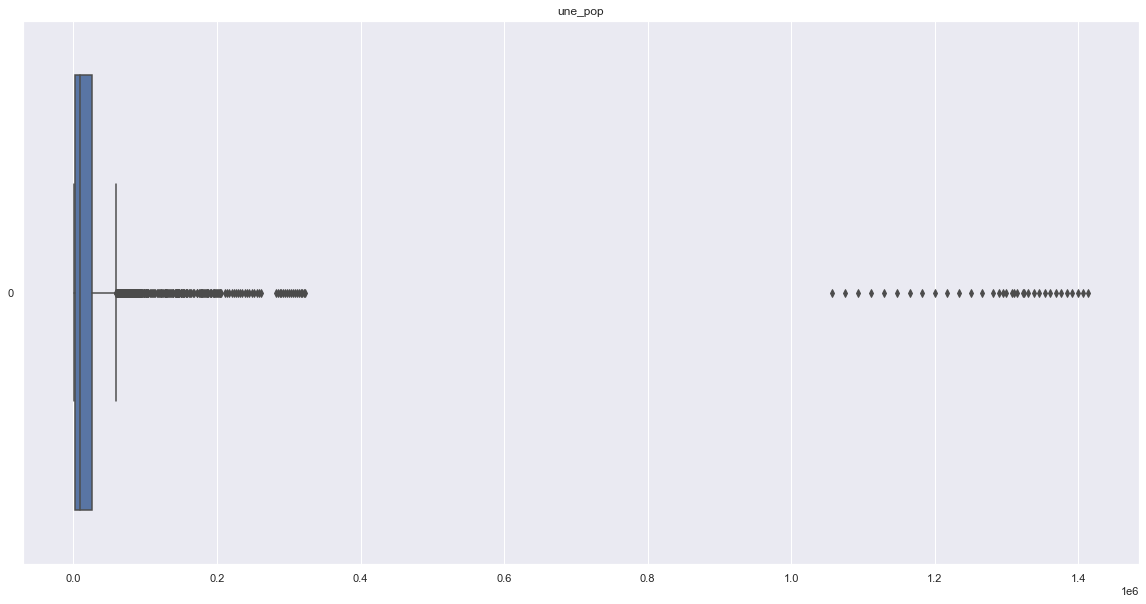

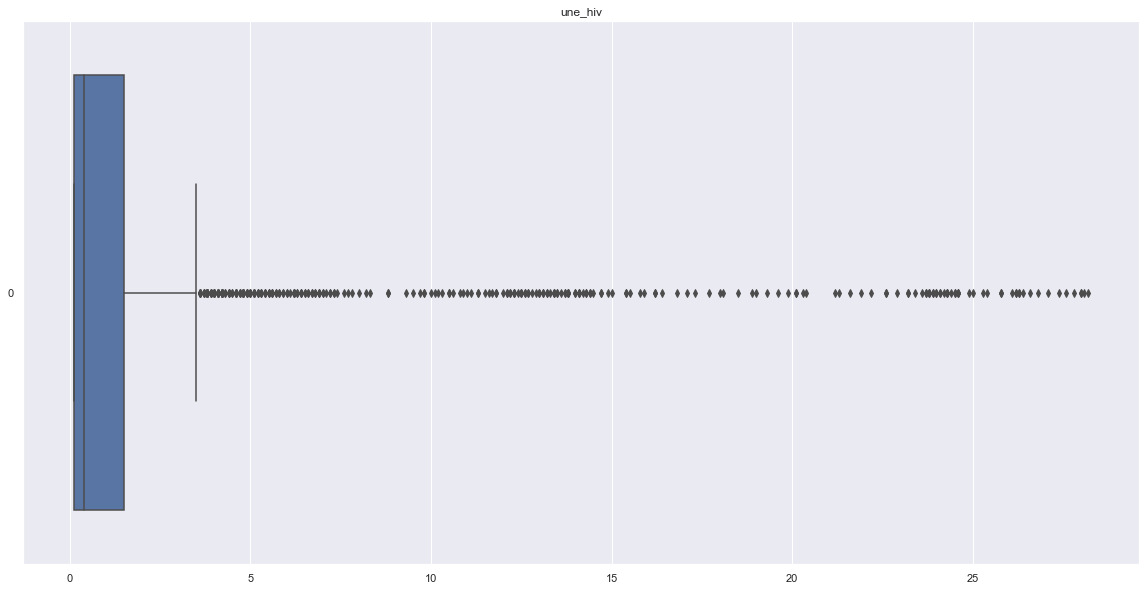

In [63]:
for var in varwithna:
    f = plt.figure(figsize=(20,10))
    sb.boxplot(data = varwithna[var], orient = "h").set_title(var)

In [64]:
Q1 = varwithna.quantile(0.25)
Q3 = varwithna.quantile(0.75)
outlier = ((varwithna < (Q1 - 1.5 * (Q3 - Q1))) | (varwithna > (Q3 + 1.5 * (Q3 - Q1))))
outlier.sum()

alcohol              3
bmi                 25
age5-19thinness     92
age5-19obesity      40
hepatitis          235
measles            164
polio              203
diphtheria         244
basic_water         35
doctors             10
gni_capita         141
gghe-d              55
che_gdp             21
une_pop            365
une_hiv            309
dtype: int64

From the analysis we can see the une_pop has the greatest number of outliers followed by une_hiv. If the correlation of une_pop and une_hivwith life_expect and life_exp60 is very low we will drop the rows with the outlier and plot the ML model to see if there is a difference with and without une_pop.

# Multivariate exploration


In [65]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [66]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [67]:
year = pd.DataFrame(new_df['year'])
year

year
0     2000
1     2001
2     2002
3     2003
4     2004
...    ...
3106  2012
3107  2013
3108  2014
3109  2015
3110  2016

[3111 rows x 1 columns]

In [68]:
life_expect = pd.DataFrame(new_df['life_expect'])
life_expect

life_expect
0        47.33730
1        48.19789
2        49.42569
3        50.50266
4        51.52863
...           ...
3106     64.49448
3107     64.79716
3108     65.10757
3109     65.45008
3110     65.79089

[3111 rows x 1 columns]

In [69]:
life_exp60 = pd.DataFrame(new_df['life_exp60'])
life_exp60

life_exp60
0       14.73400
1       14.95963
2       15.20010
3       15.39144
4       15.56860
...          ...
3106    16.57977
3107    16.64219
3108    16.70787
3109    16.77074
3110    16.83024

[3111 rows x 1 columns]

In [70]:
country = pd.DataFrame(new_df['country'])
country

country
0                               Angola
1                               Angola
2                               Angola
3                               Angola
4                               Angola
...                                ...
3106  Lao People's Democratic Republic
3107  Lao People's Democratic Republic
3108  Lao People's Democratic Republic
3109  Lao People's Democratic Republic
3110  Lao People's Democratic Republic

[3111 rows x 1 columns]

In [71]:
lewithcountry = pd.concat([year,life_expect,country],axis=1).reindex(year.index)
lewithcountry

year  life_expect                           country
0     2000     47.33730                            Angola
1     2001     48.19789                            Angola
2     2002     49.42569                            Angola
3     2003     50.50266                            Angola
4     2004     51.52863                            Angola
...    ...          ...                               ...
3106  2012     64.49448  Lao People's Democratic Republic
3107  2013     64.79716  Lao People's Democratic Republic
3108  2014     65.10757  Lao People's Democratic Republic
3109  2015     65.45008  Lao People's Democratic Republic
3110  2016     65.79089  Lao People's Democratic Republic

[3111 rows x 3 columns]

In [72]:
lewithcountry60 = pd.concat([year,life_exp60,country],axis=1).reindex(year.index)
lewithcountry60

year  life_exp60                           country
0     2000    14.73400                            Angola
1     2001    14.95963                            Angola
2     2002    15.20010                            Angola
3     2003    15.39144                            Angola
4     2004    15.56860                            Angola
...    ...         ...                               ...
3106  2012    16.57977  Lao People's Democratic Republic
3107  2013    16.64219  Lao People's Democratic Republic
3108  2014    16.70787  Lao People's Democratic Republic
3109  2015    16.77074  Lao People's Democratic Republic
3110  2016    16.83024  Lao People's Democratic Republic

[3111 rows x 3 columns]

In [73]:
region_names = new_df['region'].unique()
#region_names
for region in region_names:
    fig = px.line(pd.DataFrame(new_df[new_df['region']==region]), x="year", y="life_expect", title='Life expectancy of countries in ' +region + ' over the years',color='country')
    fig.show()
    #df_africa = pd.DataFrame(new_df[new_df['region']=="Africa"])
#df_africa

In [74]:
new_df.loc[new_df.country == "Haiti"]

country    region  year  life_expect  life_exp60  adult_mort_rate  \
1156   Haiti  Americas  2000     58.11105    16.01434         0.305754   
1157   Haiti  Americas  2001     58.35919    15.93828         0.303458   
1158   Haiti  Americas  2002     58.61541    15.89237         0.300451   
1159   Haiti  Americas  2003     58.97600    16.02604         0.296819   
1160   Haiti  Americas  2004     58.44833    16.57610         0.317546   
1161   Haiti  Americas  2005     60.78857    18.08035         0.289718   
1162   Haiti  Americas  2006     61.89331    19.17556         0.282385   
1163   Haiti  Americas  2007     62.84785    19.86280         0.271739   
1164   Haiti  Americas  2008     63.20292    19.90732         0.265995   
1165   Haiti  Americas  2009     63.52611    19.60390         0.256799   
1166   Haiti  Americas  2010     36.22736    10.72800         0.682531   
1167   Haiti  Americas  2011     62.91904    18.21022         0.256144   
1168   Haiti  Americas  2012     62.60593    17.64584         0.256473   
1169   Haiti  Americas  2013     62.79170    17.57488         0.252640   
1170   Haiti  Americas  2014     63.07725    17.59745         0.247677   
1171   Haiti  Americas  2015     63.33545    17.63708         0.244625   
1172   Haiti  Americas  2016     63.50980    17.68188         0.243457   

      infant_mort_rate  age1-4_mort_rate  alcohol   bmi  ...  measles  polio  \
1156          0.077790          0.008130  3.62600  23.3  ...     55.0   50.0   
1157          0.075705          0.007740  3.62304  23.4  ...     55.0   52.0   
1158          0.073975          0.007390  3.65001  23.5  ...     56.0   54.0   
1159          0.072405          0.007095  3.55774  23.7  ...     57.0   56.0   
1160          0.071485          0.007390  3.57617  23.8  ...     57.0   58.0   
1161          0.069410          0.006580  3.49451  23.9  ...     58.0   60.0   
1162          0.067600          0.006360  3.50810  24.1  ...     59.0   61.0   
1163          0.065640          0.006150  3.44345  24.2  ...     60.0   62.0   
1164          0.063725          0.005980  3.48873  24.3  ...     62.0   64.0   
1165          0.061785          0.005680  3.52558  24.5  ...     63.0   65.0   
1166          0.077865          0.021100  2.31526  24.6  ...     64.0   66.0   
1167          0.058780          0.005110  2.40042  24.7  ...     65.0   67.0   
1168          0.058055          0.004955  2.46710  24.8  ...     66.0   66.0   
1169          0.057060          0.004800  2.87881  25.0  ...     68.0   64.0   
1170          0.056105          0.004635  2.69021  25.1  ...     69.0   63.0   
1171          0.054930          0.004445  2.66725  25.2  ...     69.0   64.0   
1172          0.053515          0.004355  2.72063  25.3  ...     69.0   64.0   

      diphtheria  basic_water  doctors  gni_capita   gghe-d   che_gdp  \
1156        43.0     56.23929      NaN      1370.0  1.50095   6.87874   
1157        46.0     57.06076      NaN      1370.0  1.28027   6.60283   
1158        50.0     57.89031      NaN      1370.0  0.85304   5.98888   
1159        53.0     58.72479      NaN      1370.0  0.84294   5.76705   
1160        57.0     59.25749      NaN      1370.0  1.00066   5.85192   
1161        60.0     59.75303      NaN      1420.0  0.97240   5.50936   
1162        62.0     60.24738      NaN      1450.0  0.45774   5.50104   
1163        64.0     60.73926      NaN      1520.0  1.28229   5.90158   
1164        64.0     61.22998      NaN      1540.0  1.33276   6.01590   
1165        65.0     61.71658      NaN      1580.0  1.37766   6.16916   
1166        67.0     62.20079      NaN      1490.0  1.45539   8.14560   
1167        68.0     62.68180    1.378      1590.0  0.72975  10.23136   
1168        66.0     63.15966      NaN      1640.0  0.79497   9.66830   
1169        65.0     63.63269      NaN      1710.0  0.83835   7.23788   
1170        63.0     64.10223      NaN      1710.0  0.80789   7.79764   
1171        64.0     64.56748    0.852      1710.0  0.95361   8

In [75]:
new_df.loc[new_df.country == "Myanmar"]

country           region  year  life_expect  life_exp60  \
2669  Myanmar  South-East Asia  2000     61.55658    16.11718   
2670  Myanmar  South-East Asia  2001     61.88383    16.16782   
2671  Myanmar  South-East Asia  2002     62.19821    16.21842   
2672  Myanmar  South-East Asia  2003     62.52288    16.26947   
2673  Myanmar  South-East Asia  2004     62.80804    16.31755   
2674  Myanmar  South-East Asia  2005     63.11821    16.37241   
2675  Myanmar  South-East Asia  2006     63.41293    16.42039   
2676  Myanmar  South-East Asia  2007     63.67214    16.46834   
2677  Myanmar  South-East Asia  2008     58.16859    15.40379   
2678  Myanmar  South-East Asia  2009     64.27667    16.57287   
2679  Myanmar  South-East Asia  2010     64.63361    16.62897   
2680  Myanmar  South-East Asia  2011     64.96067    16.67730   
2681  Myanmar  South-East Asia  2012     65.36779    16.72469   
2682  Myanmar  South-East Asia  2013     65.81506    16.76378   
2683  Myanmar  South-East Asia  2014     66.21016    16.79910   
2684  Myanmar  South-East Asia  2015     66.51804    16.82827   
2685  Myanmar  South-East Asia  2016     66.80213    16.85373   

      adult_mort_rate  infant_mort_rate  age1-4_mort_rate  alcohol   bmi  ...  \
2669         0.245493          0.067945          0.006690  0.11921  21.3  ...   
2670         0.242826          0.065940          0.006365  0.12478  21.4  ...   
2671         0.240486          0.063795          0.006085  0.14086  21.5  ...   
2672         0.237980          0.061580          0.005850  0.61333  21.5  ...   
2673         0.235899          0.059660          0.005610  0.63982  21.6  ...   
2674         0.232999          0.058130          0.005355  0.63460  21.7  ...   
2675         0.230129          0.057185          0.005015  0.67208  21.8  ...   
2676         0.227125          0.056620          0.004735  0.74736  21.8  ...   
2677         0.306627          0.060615          0.008155  0.78967  21.9  ...   
2678         0.218924          0.055550          0.004240  0.87833  22.0  ...   
2679         0.214708          0.054355          0.003975  0.97376  22.1  ...   
2680         0.211488          0.052450          0.003800  1.09496  22.2  ...   
2681         0.207638          0.049965          0.003600  1.24054  22.3  ...   
2682         0.203188          0.047300          0.003410  1.31299  22.4  ...   
2683         0.199722          0.044775          0.003195  1.36119  22.5  ...   
2684         0.197304          0.042650          0.003015  1.46244  22.6  ...   
2685         0.194953          0.040935          0.002840  1.60395  22.6  ...   

      measles  polio  diphtheria  basic_water  doctors  gni_capita   gghe-d  \
2669     84.0   88.0        82.0     46.26788  3.66300         NaN  0.24251   
2670     73.0   77.0        73.0     48.30663  3.66300         NaN  0.20695   
2671     77.0   84.0        79.0     50.38422  3.66300         NaN  0.29086   
2672     80.0   86.0        78.0     52.50074  3.66300         NaN  0.20886   
2673     86.0   92.0        82.0     54.65594  3.66300         NaN  0.23193   
2674     84.0   86.0        73.0     56.84962  3.79700         NaN  0.14686   
2675     78.0   82.0        82.0     59.08124  4.15800         NaN  0.23121   
2676     81.0   84.0        86.0     61.35087  4.39300         NaN  0.17396   
2677     82.0   85.0        85.0     63.65826  4.74800         NaN  0.15714   
2678     87.0   90.0        90.0     66.00294  4.88300         NaN  0.17729   
2679     88.0   90.0        90.0     68.38513  5.22400         NaN  0.17960   
2680     88.0   90.0        84.0     70.80415  5.50600         NaN  0.21336   
2681     84.0   87.0        84.0     73.25996  5.80200         NaN  0.39958   
2682     86.0   76.0        75.0     75.75214  5.90025         NaN  0.57534   
2683     88.0   88.0        88.0     78.28081  5.99850         NaN  1.00353   
2684     84.0   89.0        89.0     79.91476  6.09675         NaN  1.14297   
2685     91.0   89.0        90.0 

From the line graphs above, the life expectancies of most countries in the different regions generally increased over the years. We are interested in finding out what factors are significant in contributing towards the rise in life expectancy of the countries over the years. However, there are some sudden drops in life expectancy in Myanmar in 2008, in the Syrian Arab Republic in 2014 and Haiti in 2010. 

Upon further research, we found that the sudden drop in life expectancy was due natural disaster and tragedies. Cyclone Nargis struck Myanmar in 2008, a 7.0 magnitude earthquake occured in Haiti in 2010 and Syrian Arab Republic was engaged in the syrian war in 2014.

Hence something to note is that the features do not have a cause and effect relationship with life expectancy as there are many unprecedented circumstances that could alter life expectancy.

Creating a new dataframe with life_expect and life_exp60 and dropped the categorical data in order to do numerical analysis. 

In [76]:
df_numeric = df.drop(labels= ['country','region','year'],axis=1)
df_numeric.info()
df_numeric.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   life_expect       3111 non-null   float64
 1   life_exp60        3111 non-null   float64
 2   adult_mort_rate   3111 non-null   float64
 3   infant_mort_rate  3111 non-null   float64
 4   age1-4_mort_rate  3111 non-null   float64
 5   alcohol           3083 non-null   float64
 6   bmi               3077 non-null   float64
 7   age5-19thinness   3077 non-null   float64
 8   age5-19obesity    3077 non-null   float64
 9   hepatitis         2881 non-null   float64
 10  measles           3100 non-null   float64
 11  polio             3100 non-null   float64
 12  diphtheria        3100 non-null   float64
 13  basic_water       3100 non-null   float64
 14  doctors           2216 non-null   float64
 15  gni_capita        3004 non-null   float64
 16  gghe-d            3043 non-null   float64


(3111, 20)

In [77]:
df_numeric.describe()


life_expect   life_exp60  adult_mort_rate  infant_mort_rate  \
count  3111.000000  3111.000000      3111.000000       3111.000000   
mean     69.146384    18.912060         0.193528          0.032496   
std       9.129761     2.885412         0.114007          0.030361   
min      36.227360    10.728000         0.049202          0.001470   
25%      63.200095    16.619485         0.108270          0.008255   
50%      71.597200    18.508260         0.164822          0.019995   
75%      75.537030    21.099175         0.250832          0.051720   
max      84.166160    26.394020         0.696874          0.164515   

       age1-4_mort_rate      alcohol          bmi  age5-19thinness  \
count       3111.000000  3083.000000  3077.000000      3077.000000   
mean           0.003489     4.850654    25.052714         5.312447   
std            0.005146     4.002535     2.193445         4.652408   
min            0.000065     0.000000    19.800000         0.100000   
25%            0.000355     1.200510    23.300000         1.800000   
50%            0.000895     4.021600    25.500000         3.800000   
75%            0.004877     7.814025    26.500000         7.800000   
max            0.039095    20.182460    32.200000        28.100000   

       age5-19obesity    hepatitis      measles        polio   diphtheria  \
count     3077.000000  2881.000000  3100.000000  3100.000000  3100.000000   
mean         5.972278    82.141617    85.530000    86.584194    86.406129   
std          4.530812    20.565142    15.282203    14.975650    15.335294   
min          0.100000     2.000000    16.000000     8.000000    19.000000   
25%          2.000000    76.000000    79.000000    81.000000    82.000000   
50%          5.200000    91.000000    92.000000    93.000000    93.000000   
75%          8.900000    96.000000    96.000000    97.000000    97.000000   
max         26.700000    99.000000    99.000000    99.000000    99.000000   

       basic_water      doctors     gni_capita       gghe-d      che_gdp  \
count  3100.000000  2216.000000    3004.000000  3043.000000  3026.000000   
mean     83.390295    18.021928   14329.687084     3.116490     6.119615   
std      19.238249    13.906474   17262.440711     2.086198     2.514591   
min      18.695210     0.128000     250.000000     0.062360     1.025160   
25%      71.832917     4.346875    2690.000000     1.532075     4.234580   
50%      92.203705    17.674500    8027.000000     2.601750     5.764255   
75%      98.552870    28.570250   19655.000000     4.269990     7.880403   
max     100.000010    79.541000  123860.000000    12.062730    20.413410   

            une_pop      une_hiv  
count  3.080000e+03  2380.000000  
mean   3.722953e+04     2.031513  
std    1.377832e+05     4.585364  
min    7.601600e+01     0.100000  
25%    2.197585e+03     0.100000  
50%    8.568698e+03     0.400000  
75%    2.517140e+04     1.500000  
max    1.414049e+06    28.200000

In [78]:
print(df_numeric.corr())


                  life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
life_expect          1.000000    0.886159        -0.946419         -0.930113   
life_exp60           0.886159    1.000000        -0.775321         -0.769839   
adult_mort_rate     -0.946419   -0.775321         1.000000          0.813210   
infant_mort_rate    -0.930113   -0.769839         0.813210          1.000000   
age1-4_mort_rate    -0.864414   -0.661082         0.756230          0.909032   
alcohol              0.402975    0.465281        -0.250410         -0.448747   
bmi                  0.597996    0.458839        -0.517095         -0.641874   
age5-19thinness     -0.565396   -0.556536         0.455205          0.578230   
age5-19obesity       0.621000    0.547764        -0.571792         -0.602402   
hepatitis            0.398373    0.299663        -0.326215         -0.470327   
measles              0.640817    0.505314        -0.526452         -0.720781   
polio                0.646339    0.50197

<AxesSubplot:>

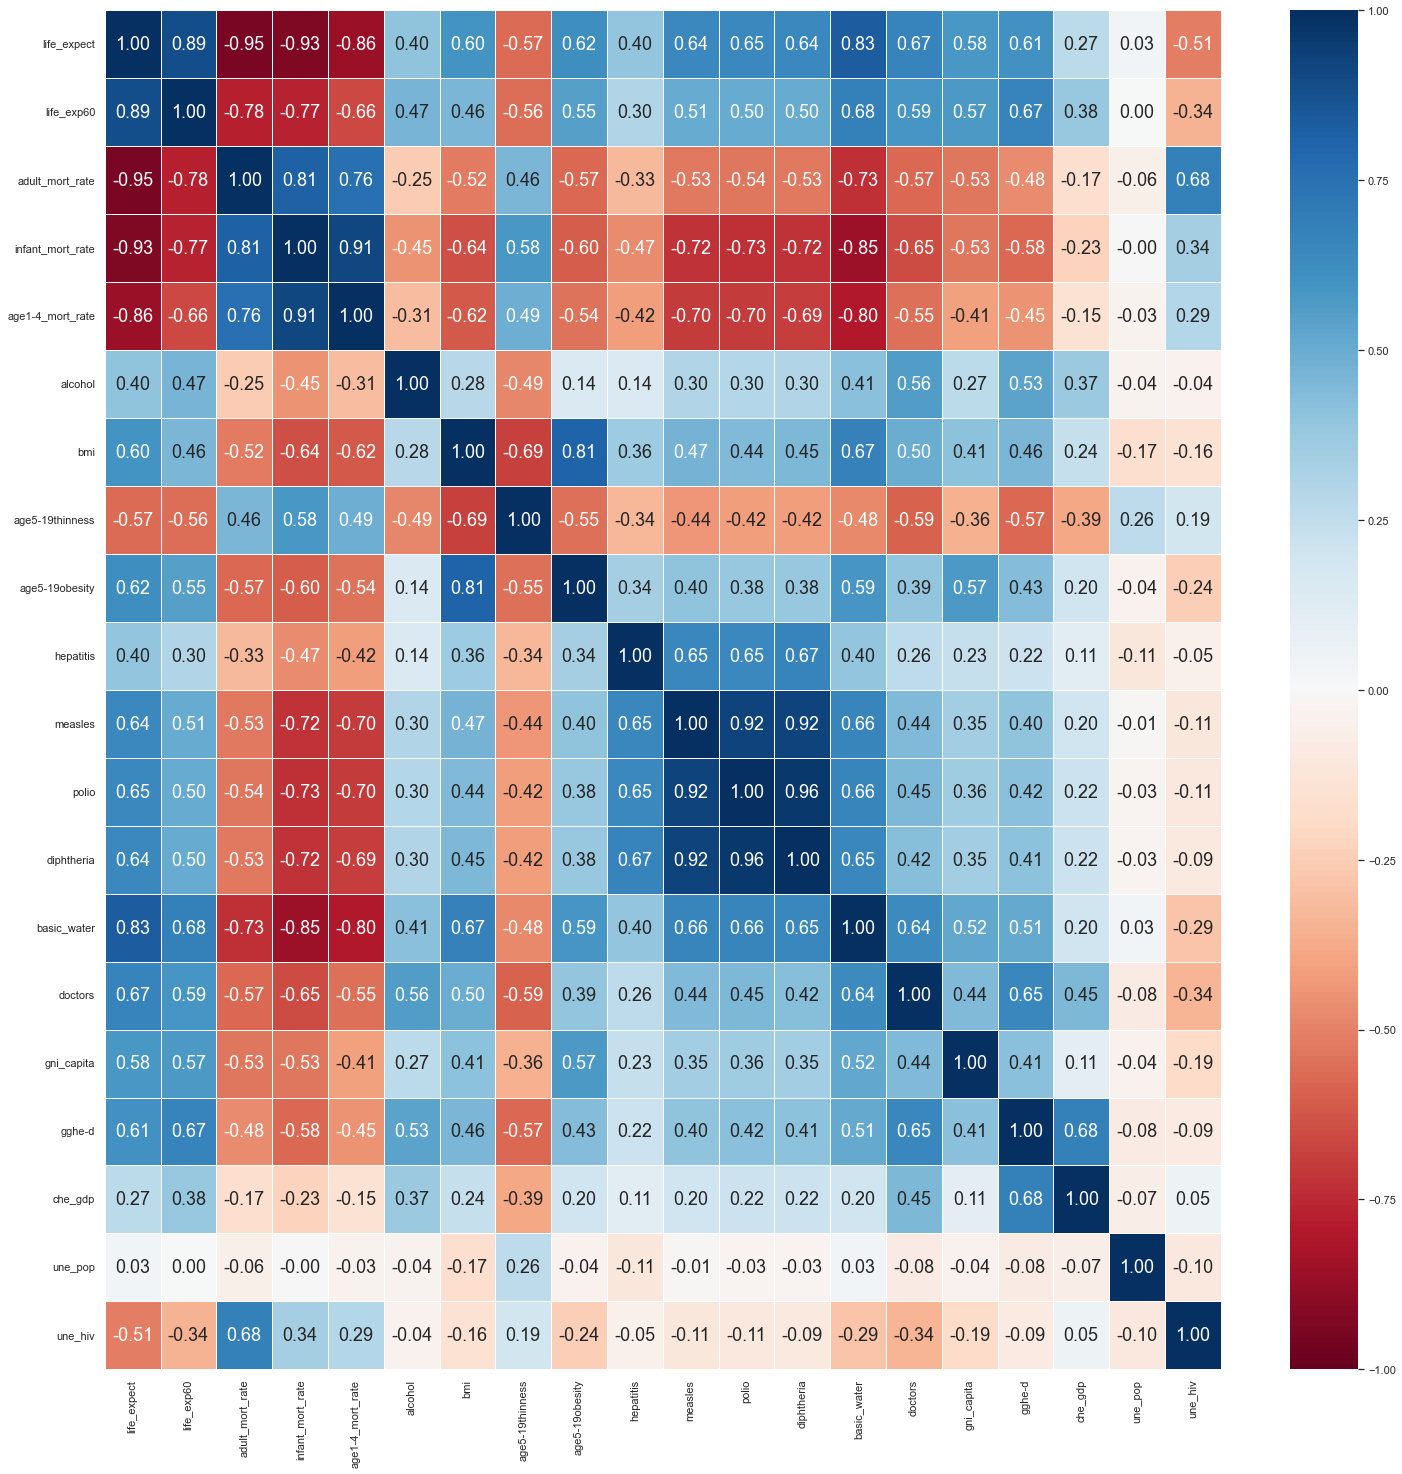

In [79]:
# Heatmap of the Correlation Matrix
#should i do according to regions? or year?
f = plt.figure(figsize=(25, 25))
sb.heatmap(df_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [80]:
region_names = df['region'].unique()
region_names

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

compare 2 variables using jointplot in order to see which factor is the most significant

# Comparing features with life_expect

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_18748/2259564281.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1440x720 with 0 Axes>

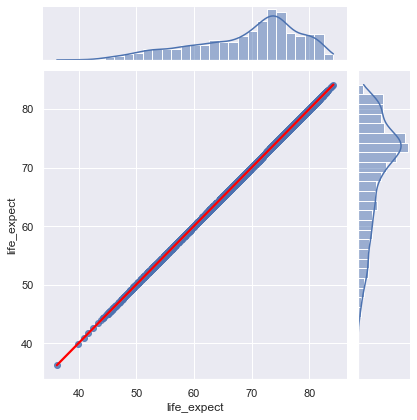

<Figure size 1440x720 with 0 Axes>

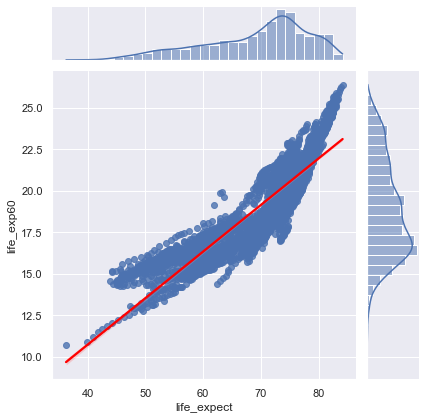

<Figure size 1440x720 with 0 Axes>

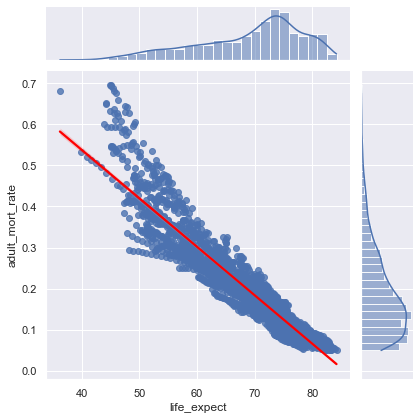

<Figure size 1440x720 with 0 Axes>

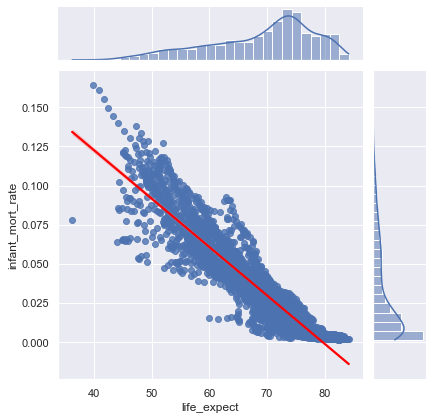

<Figure size 1440x720 with 0 Axes>

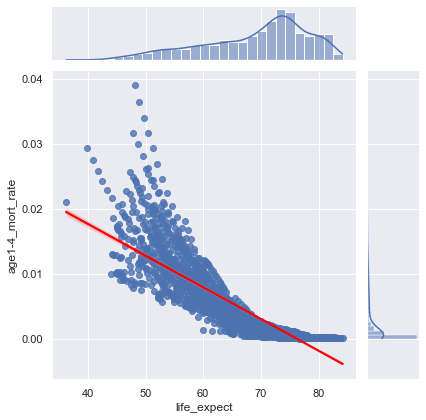

<Figure size 1440x720 with 0 Axes>

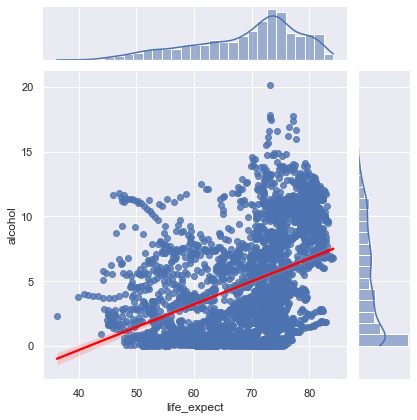

<Figure size 1440x720 with 0 Axes>

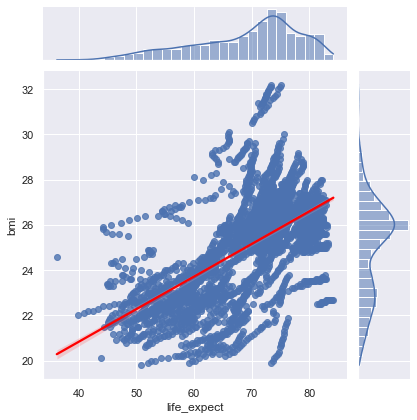

<Figure size 1440x720 with 0 Axes>

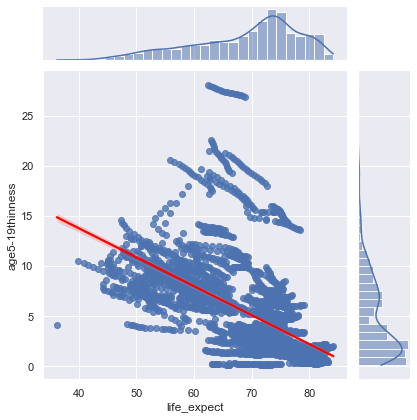

<Figure size 1440x720 with 0 Axes>

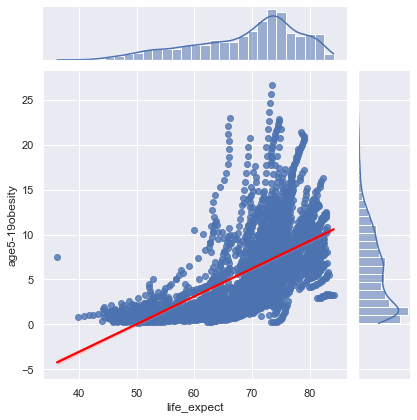

<Figure size 1440x720 with 0 Axes>

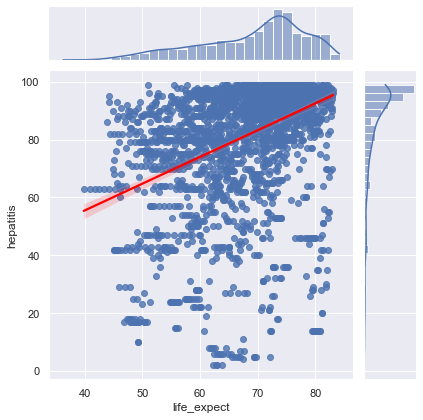

<Figure size 1440x720 with 0 Axes>

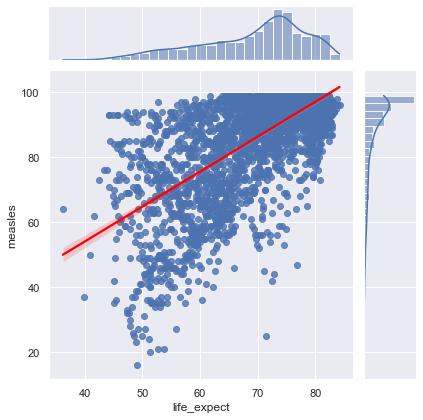

<Figure size 1440x720 with 0 Axes>

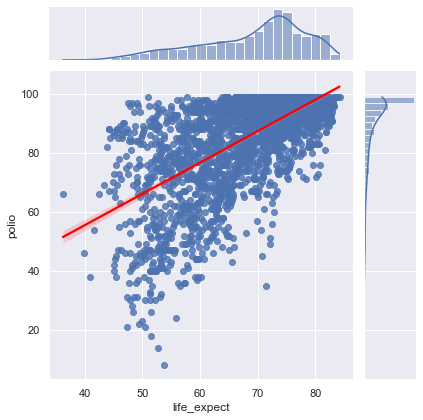

<Figure size 1440x720 with 0 Axes>

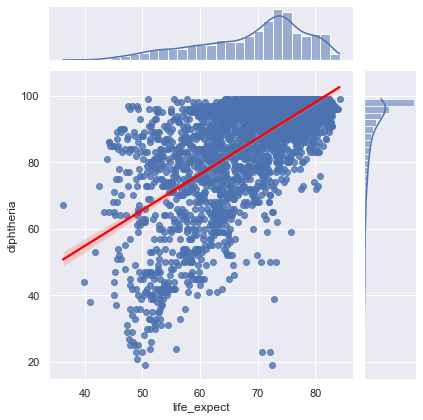

<Figure size 1440x720 with 0 Axes>

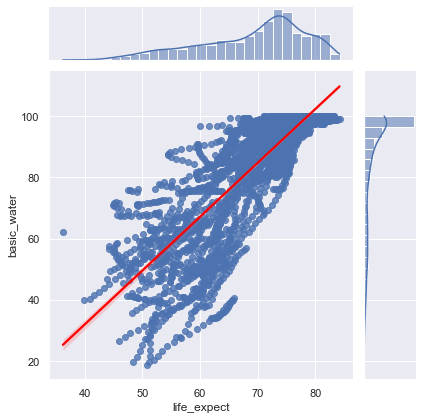

<Figure size 1440x720 with 0 Axes>

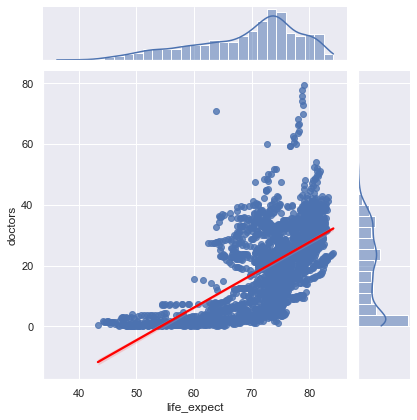

<Figure size 1440x720 with 0 Axes>

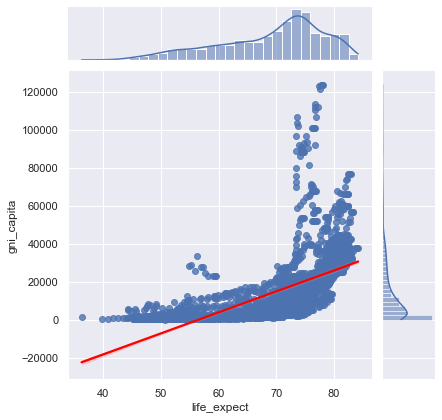

<Figure size 1440x720 with 0 Axes>

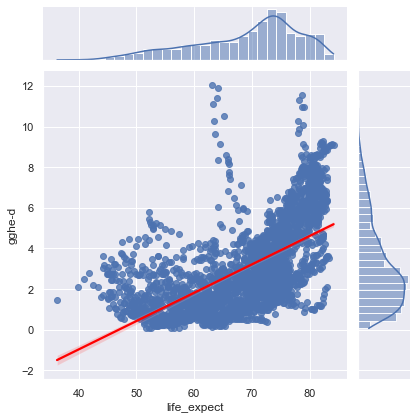

<Figure size 1440x720 with 0 Axes>

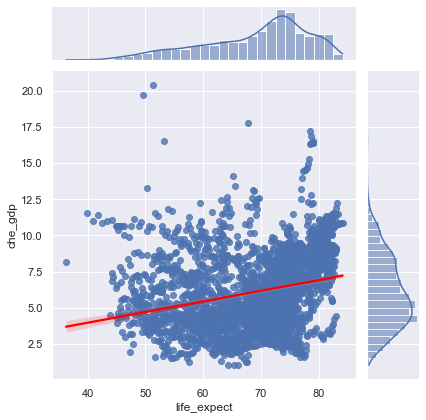

<Figure size 1440x720 with 0 Axes>

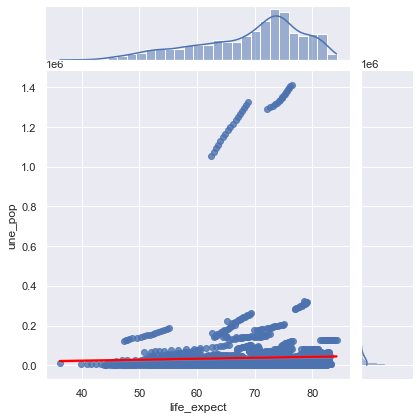

<Figure size 1440x720 with 0 Axes>

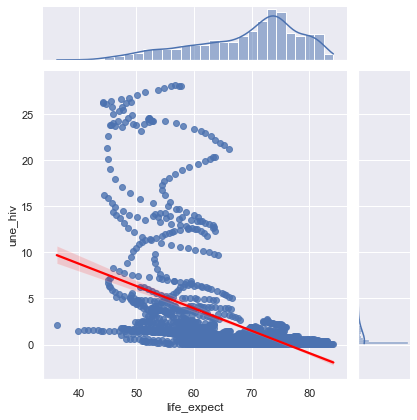

In [81]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

# Comparing features with life_exp60

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_18748/3726013038.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1440x720 with 0 Axes>

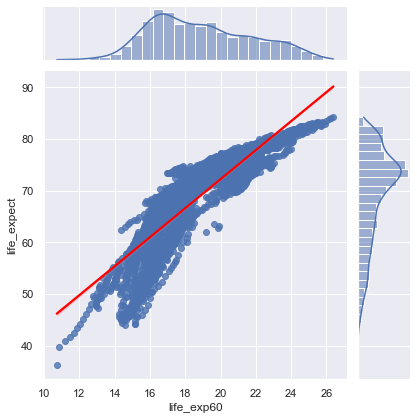

<Figure size 1440x720 with 0 Axes>

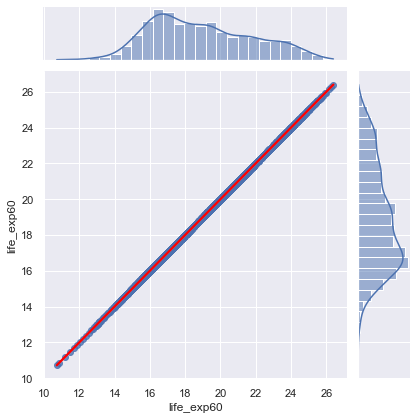

<Figure size 1440x720 with 0 Axes>

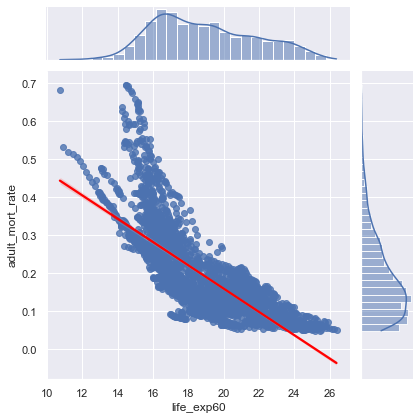

<Figure size 1440x720 with 0 Axes>

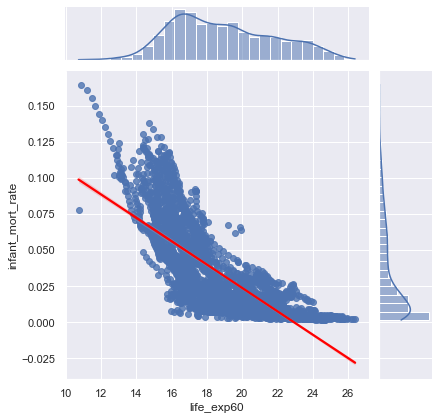

<Figure size 1440x720 with 0 Axes>

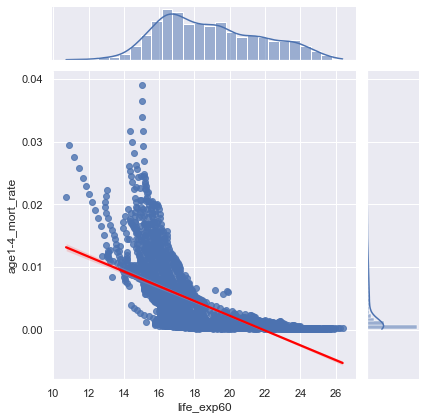

<Figure size 1440x720 with 0 Axes>

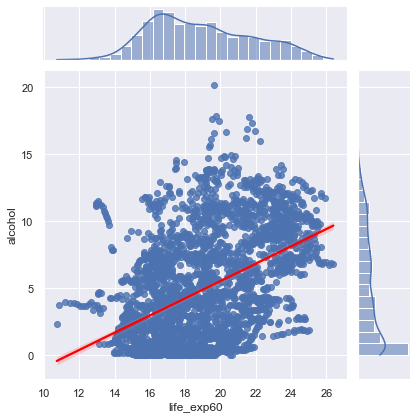

<Figure size 1440x720 with 0 Axes>

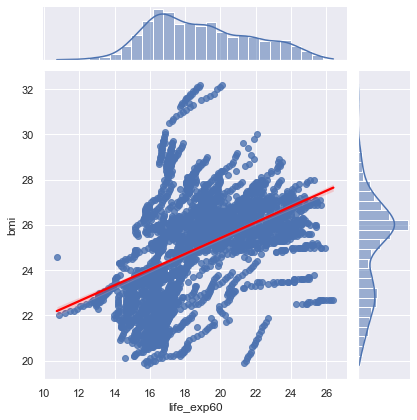

<Figure size 1440x720 with 0 Axes>

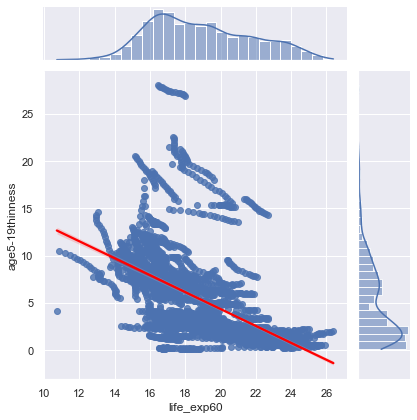

<Figure size 1440x720 with 0 Axes>

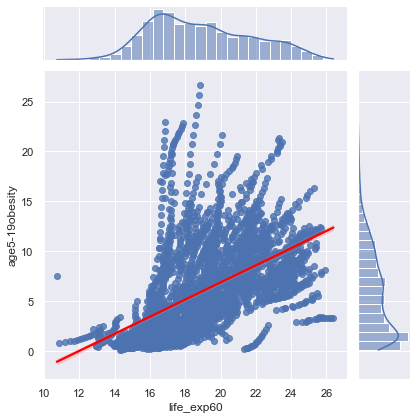

<Figure size 1440x720 with 0 Axes>

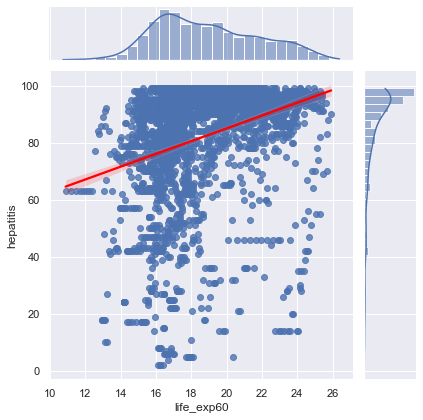

<Figure size 1440x720 with 0 Axes>

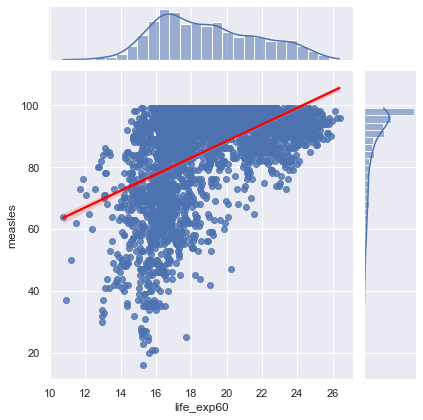

<Figure size 1440x720 with 0 Axes>

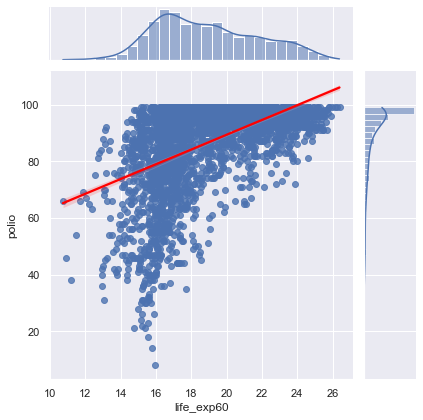

<Figure size 1440x720 with 0 Axes>

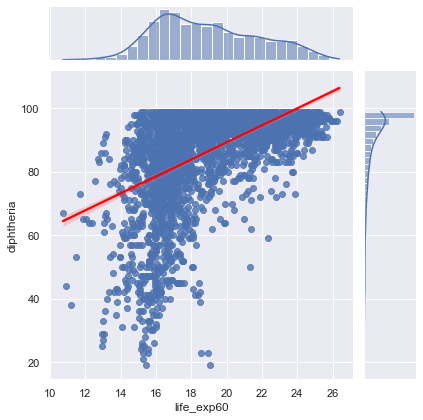

<Figure size 1440x720 with 0 Axes>

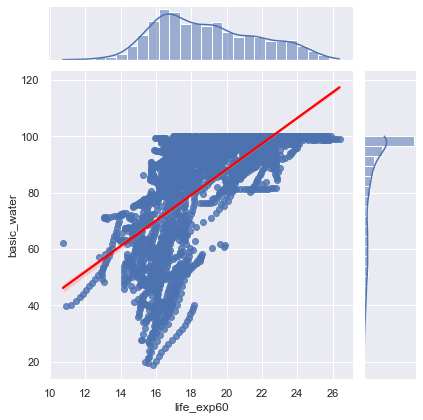

<Figure size 1440x720 with 0 Axes>

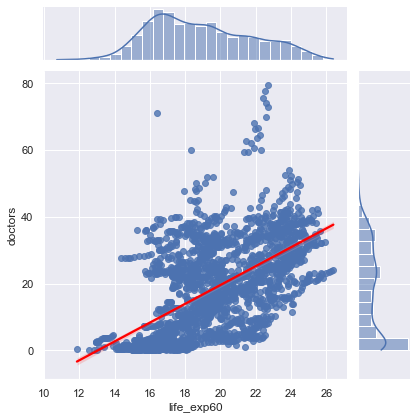

<Figure size 1440x720 with 0 Axes>

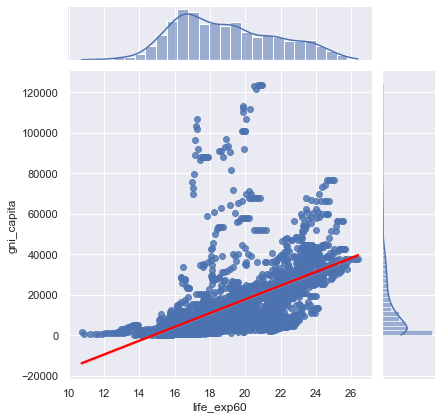

<Figure size 1440x720 with 0 Axes>

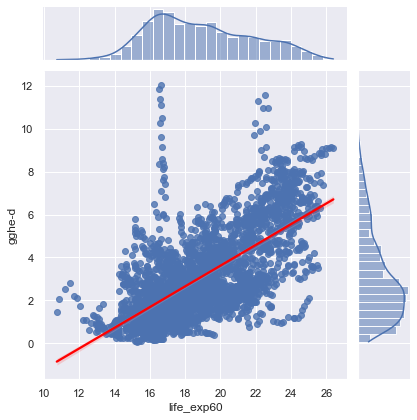

<Figure size 1440x720 with 0 Axes>

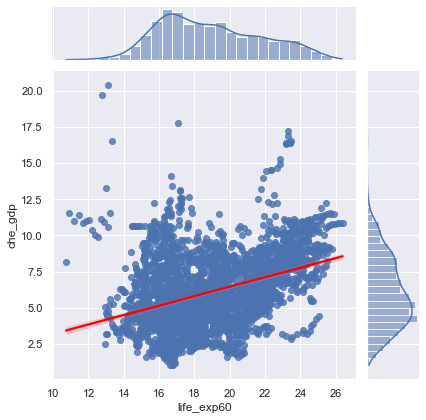

<Figure size 1440x720 with 0 Axes>

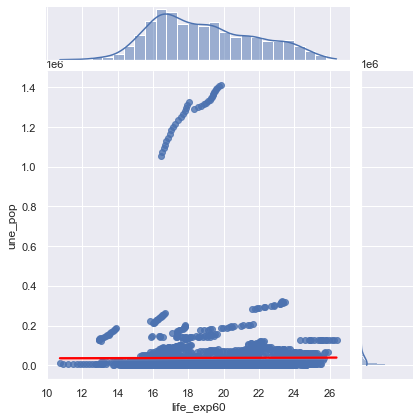

<Figure size 1440x720 with 0 Axes>

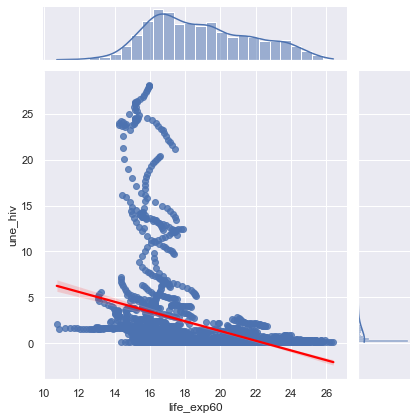

In [82]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_exp60", y=i, kind="reg",line_kws={"color": "red"})

# Outlier analysis

From the heatmap the correlation of une_pop is very low at 0.03 with life_expect and 0.00 with life_exp60. The distribution on the scatter plot also does not show a strong relationship with life_expect and life_exp60. Hence, we can drop une_pop since it is not very relevant to predicting life expectancy. However, we would not drop une_hiv since it still has a relationship with life_expect and life_exp60 as seen in the jointplot despite the feature having the second most amount of outliers.

# Insights from EDA

From the jointplot, we can see the alcohol has a positive relation with life expectancy and life expectancy from 60. Alcohol has a 0.40 correlation with life expectancy and has a 0.47 correlation with life expectancy from 60. 

This is different from our assumption as we assumed that alcohol would have a negative relationship with life expectancy. Upon further research, we realised that alcohol in moderation can have beneficial health effects and may lead to longetivity. (https://time.com/5166514/moderate-drinking-live-longer-study/)

Furthermore, from the distibution of alcohol we can see that the median is around 4.02 liters per capita and the median of life_exp60 is around 18.5 years. The median of alcohol and life_exp60 is close to its mean. The mean of alcohol is 4.85 and the mean of life_exp is 18.91. Hence, on average, individuals in countries have a low to moderate alcohol consumption. This coincides with the positive relationship between alcohol and life expectancy when alcohol is consumed in moderation.

Since life_expect and life_exp60 have a strong correlation we just plotted life_exp60 since it has a stronger correlation with alcohol.

<Figure size 1440x720 with 0 Axes>

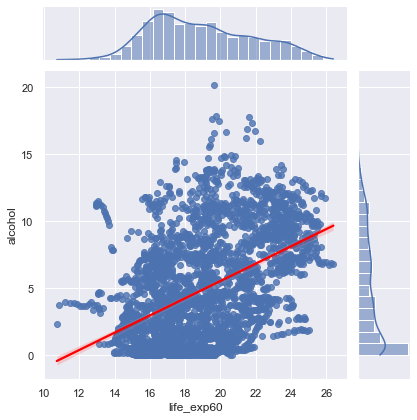

In [83]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_exp60", y="alcohol", kind="reg",line_kws={"color": "red"})

Another area of interest is the obesity rate from ages 5-19 and thiness from ages 5-19. Thinness and obesity have a slightly higher correlation with life expectancy (-0.57 and 0.62 respectively) than with life expectancy at 60 (-0.56 and 0.55 respectively). However, the correlations are very close to each other so we will just be using life_expect as a comparison.

<Figure size 1440x720 with 0 Axes>

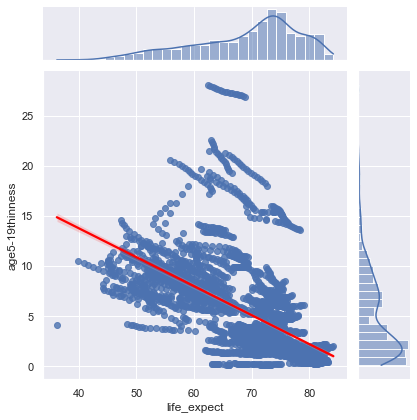

In [84]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19thinness", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

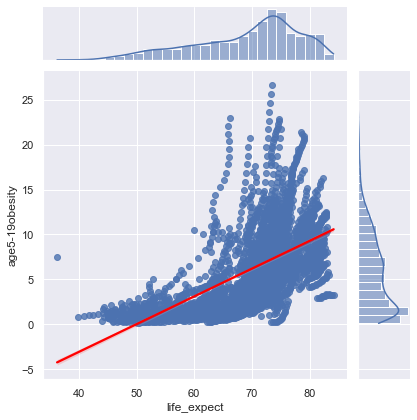

In [85]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19obesity", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

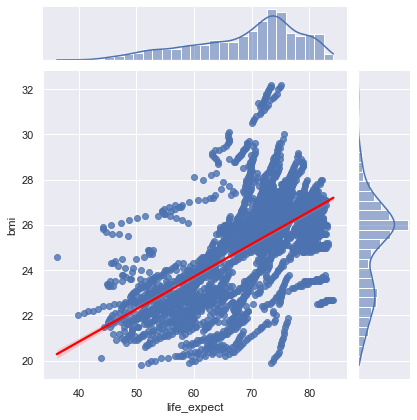

In [86]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="bmi", kind="reg",line_kws={"color": "red"})

This contradicted our assumptions that age 5-19 obesity would lead to a decreased life expectancy. 

# Analysis of top predictors for life expectancy and life expectancy at 60

From the heatmap some areas of interest are adult mortality rate, infant mortality rate and age1-4 mortality rate as they have the strongest negative correlation with life expectancy (-0.95,-0.93,-0.86 respectively). They also have the strongest correlation rate with life expectancy at 60 which is -0.78 with adult mortality rate, -0.77 with infant mortality rate and -0.66 with child(ages 1-4) mortality rate.

In [87]:
adult_mort_rate = pd.DataFrame(df_numeric['adult_mort_rate'])
adult_mort_rate

adult_mort_rate
0            0.383558
1            0.372388
2            0.354515
3            0.343217
4            0.333871
...               ...
3106         0.209267
3107         0.205146
3108         0.200820
3109         0.196661
3110         0.192794

[3111 rows x 1 columns]

In [88]:
infant_mort_rate = pd.DataFrame(df_numeric['infant_mort_rate'])
infant_mort_rate

infant_mort_rate
0             0.137985
1             0.133675
2             0.128320
3             0.122040
4             0.115700
...                ...
3106          0.055840
3107          0.055350
3108          0.054585
3109          0.053465
3110          0.051895

[3111 rows x 1 columns]

In [89]:
child_mort_rate = pd.DataFrame(df_numeric['age1-4_mort_rate'])
child_mort_rate

age1-4_mort_rate
0             0.025695
1             0.024500
2             0.023260
3             0.021925
4             0.020545
...                ...
3106          0.004845
3107          0.004600
3108          0.004405
3109          0.004160
3110          0.003990

[3111 rows x 1 columns]

In [90]:
life_exp60 = pd.DataFrame(df_numeric['life_exp60'])
life_exp60

life_exp60
0       14.73400
1       14.95963
2       15.20010
3       15.39144
4       15.56860
...          ...
3106    16.57977
3107    16.64219
3108    16.70787
3109    16.77074
3110    16.83024

[3111 rows x 1 columns]

In [91]:
mort_rate = pd.concat([life_expect,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)
mort_rate

life_expect  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0        47.33730         0.383558          0.137985          0.025695
1        48.19789         0.372388          0.133675          0.024500
2        49.42569         0.354515          0.128320          0.023260
3        50.50266         0.343217          0.122040          0.021925
4        51.52863         0.333871          0.115700          0.020545
...           ...              ...               ...               ...
3106     64.49448         0.209267          0.055840          0.004845
3107     64.79716         0.205146          0.055350          0.004600
3108     65.10757         0.200820          0.054585          0.004405
3109     65.45008         0.196661          0.053465          0.004160
3110     65.79089         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

In [92]:
mort_rate60 = pd.concat([life_exp60,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)
mort_rate60

life_exp60  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0       14.73400         0.383558          0.137985          0.025695
1       14.95963         0.372388          0.133675          0.024500
2       15.20010         0.354515          0.128320          0.023260
3       15.39144         0.343217          0.122040          0.021925
4       15.56860         0.333871          0.115700          0.020545
...          ...              ...               ...               ...
3106    16.57977         0.209267          0.055840          0.004845
3107    16.64219         0.205146          0.055350          0.004600
3108    16.70787         0.200820          0.054585          0.004405
3109    16.77074         0.196661          0.053465          0.004160
3110    16.83024         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

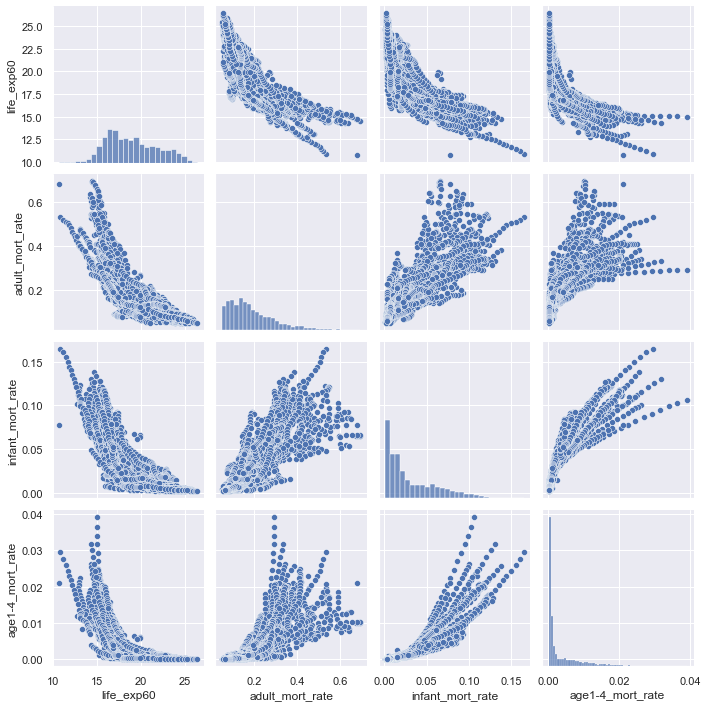

In [93]:
sb.pairplot(data = mort_rate60)

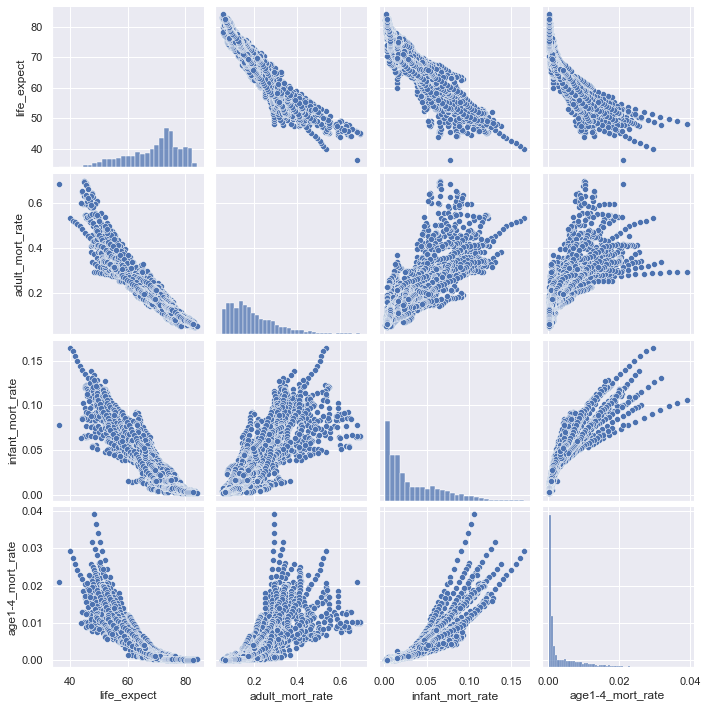

In [94]:
sb.pairplot(data = mort_rate)

There is a linear relationship between mortality rates and life expectancy as well as between mortality rates and life expectancy at 60. Since the pair plot results of both life expectancy and life expectancy at 60 is similar, we will just be using life expectancy as a comparison. 

As life expectancy increases, the mortality rates of adult, infant, and child from ages 1 to 4 all decrease as well. From the pairplot we can see that the relationship between adult mortality and life expectancy is the strongest followed by infant mortality rate and then mortality rates from ages 1-4. 

We can explore what factors are significant in affecting mortality rate across age groups and if it is the same across all age groups. 

From the heatmap above we can see a relatively high correlation between the mortality rates and other factors as well. 

For adult mortality, it has strong correlation with infant mortality,child mortality and basic water at -0.81,-0.76 and -0.73 respectively.

For infant mortality, it has strong correlation between child mortality, adult mortality and basic water as well at -0.91,-0.81 and -0.85 respectively. Infant mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.73,-0.72 and -0.72 respectively.

For child mortality(ages 1-4), it has strong correlation between infant mortality, adult mortality and basic water as well at -0.91,-0.76 and -0.80 respectively.Child mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.70,-0.70 and -0.69 respectively.

Note that children under 5 are at high risk for polio, measles and diptheria and hence being vaccinated against these diseases would contribute towards the strong linear relationship with life expectancy.



<Figure size 1440x720 with 0 Axes>

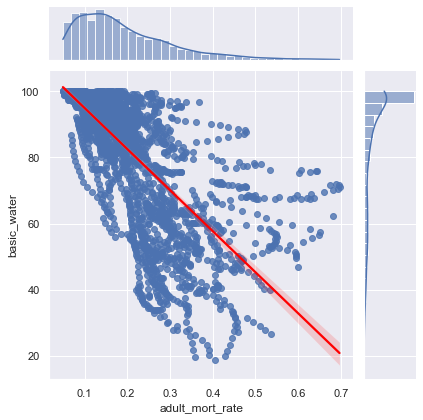

In [95]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="adult_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

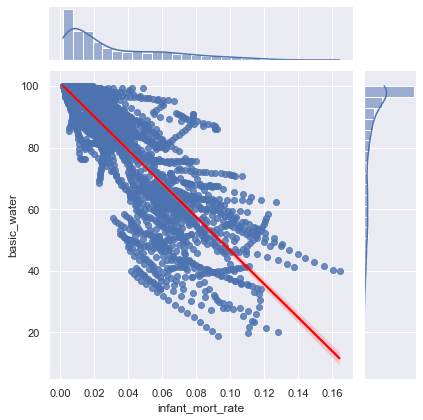

In [96]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="infant_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

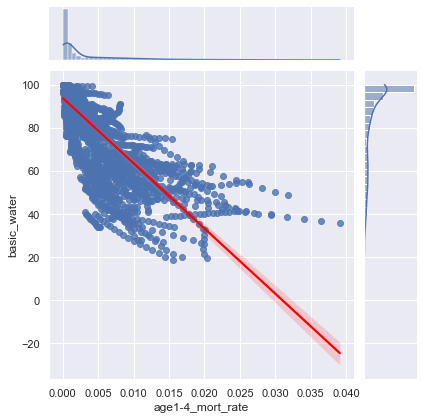

In [97]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="age1-4_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

From the scatter plots above we can see that water and adult, infant and child (1-4) mortality rate is related to the percentage of the population having access to basic water services. The median for basic water is about 92% and the median for the adult, infant and child mortality are all relatively low at around 0 to 0.2. 

This could be the reason why basic water also has a strong correlation with life expectancy which is 0.83 and life expectancy at 60 which is 0.68.


Hence, from the analysis the top 4 significant features that affect life expectancy and life expectancy at 60 is adult_mort_rate, infant_mort_rate, age1-4_mort_rate and basic_water.

# Difference between life_expect and life_exp60

The correlation of most of the features with life_expect is higher than with life_exp60 but the correlation values are close to each other. The 2 features that have higher correlation with life_exp60 than life_exp is gghe and che_gdp.life_exp60 has correlation of 0.67 and 0.38 with gghe and che_gdp respectively which is higher than 0.61 and 0.27 with life_exp. This could be attributed to the medical subsidies and services provided by the government for people at 60 years of age and beyond. In the machine learning models we will be trying to find the equation to predict life expectancy and life expectancy at 60 and the weight of each feature. We will also be comparing the models life_expect and life_exp60 to see if there is any significant differences. 

# EDA for categorical variable (region)

In [132]:
print("Number of countries for each region: ")
print(df["region"].value_counts()//17)


Number of countries for each region: 
Europe                   50
Africa                   47
Americas                 33
Eastern Mediterranean    21
Western Pacific          21
South-East Asia          11
Name: region, dtype: int64


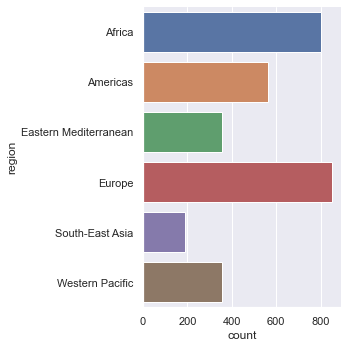

In [133]:
sb.catplot(y = "region", kind = "count", data = df)

In [134]:
regionDF = pd.concat([df['region'], df['life_expect'], df['year']], axis = 1).reindex(df['region'].index)

df_Europe = regionDF[regionDF['region']=='Europe']
df_Americas = regionDF[regionDF['region']=='Americas']
df_EM = regionDF[regionDF['region']=='Eastern Mediterranean']
df_Africa = regionDF[regionDF['region']=='Africa']
df_SEA = regionDF[regionDF['region']=='South-East Asia']
df_WP = regionDF[regionDF['region']=='Western Pacific']

print("Europe:")
display(df_Europe.describe())
print("Americas:")
display(df_Americas.describe())
print("Eastern Mediterranean:")
display(df_EM.describe())
print("Africa:")
display(df_Africa.describe())
print("South East Asia:")
display(df_SEA.describe())
print("Western Pacific:")
display(df_WP.describe())

Europe:


life_expect         year
count   850.000000   850.000000
mean     75.805259  2008.000000
std       4.824028     4.901864
min      63.543840  2000.000000
25%      72.484710  2004.000000
50%      76.143355  2008.000000
75%      80.108415  2012.000000
max      83.279110  2016.000000

Americas:


life_expect         year
count   561.000000   561.000000
mean     73.205263  2008.000000
std       4.281015     4.903352
min      36.227360  2000.000000
25%      71.185840  2004.000000
50%      73.541640  2008.000000
75%      75.592730  2012.000000
max      82.809720  2016.000000

Eastern Mediterranean:


life_expect         year
count   357.000000   357.000000
mean     69.741827  2008.000000
std       6.691956     4.905855
min      51.068950  2000.000000
25%      64.549580  2004.000000
50%      72.672550  2008.000000
75%      74.576750  2012.000000
max      79.063800  2016.000000

Africa:


life_expect         year
count   799.000000   799.000000
mean     57.679362  2008.000000
std       7.068533     4.902048
min      39.827340  2000.000000
25%      52.705245  2004.000000
50%      57.418300  2008.000000
75%      61.720360  2012.000000
max      76.363650  2016.000000

South East Asia:


life_expect         year
count   187.000000   187.000000
mean     68.667484  2008.000000
std       4.247200     4.912131
min      58.168590  2000.000000
25%      65.930770  2004.000000
50%      68.443350  2008.000000
75%      71.525110  2012.000000
max      78.415510  2016.000000

Western Pacific:


life_expect         year
count   357.000000   357.000000
mean     72.233377  2008.000000
std       6.375649     4.905855
min      57.741880  2000.000000
25%      67.656260  2004.000000
50%      71.813050  2008.000000
75%      76.411710  2012.000000
max      84.166160  2016.000000

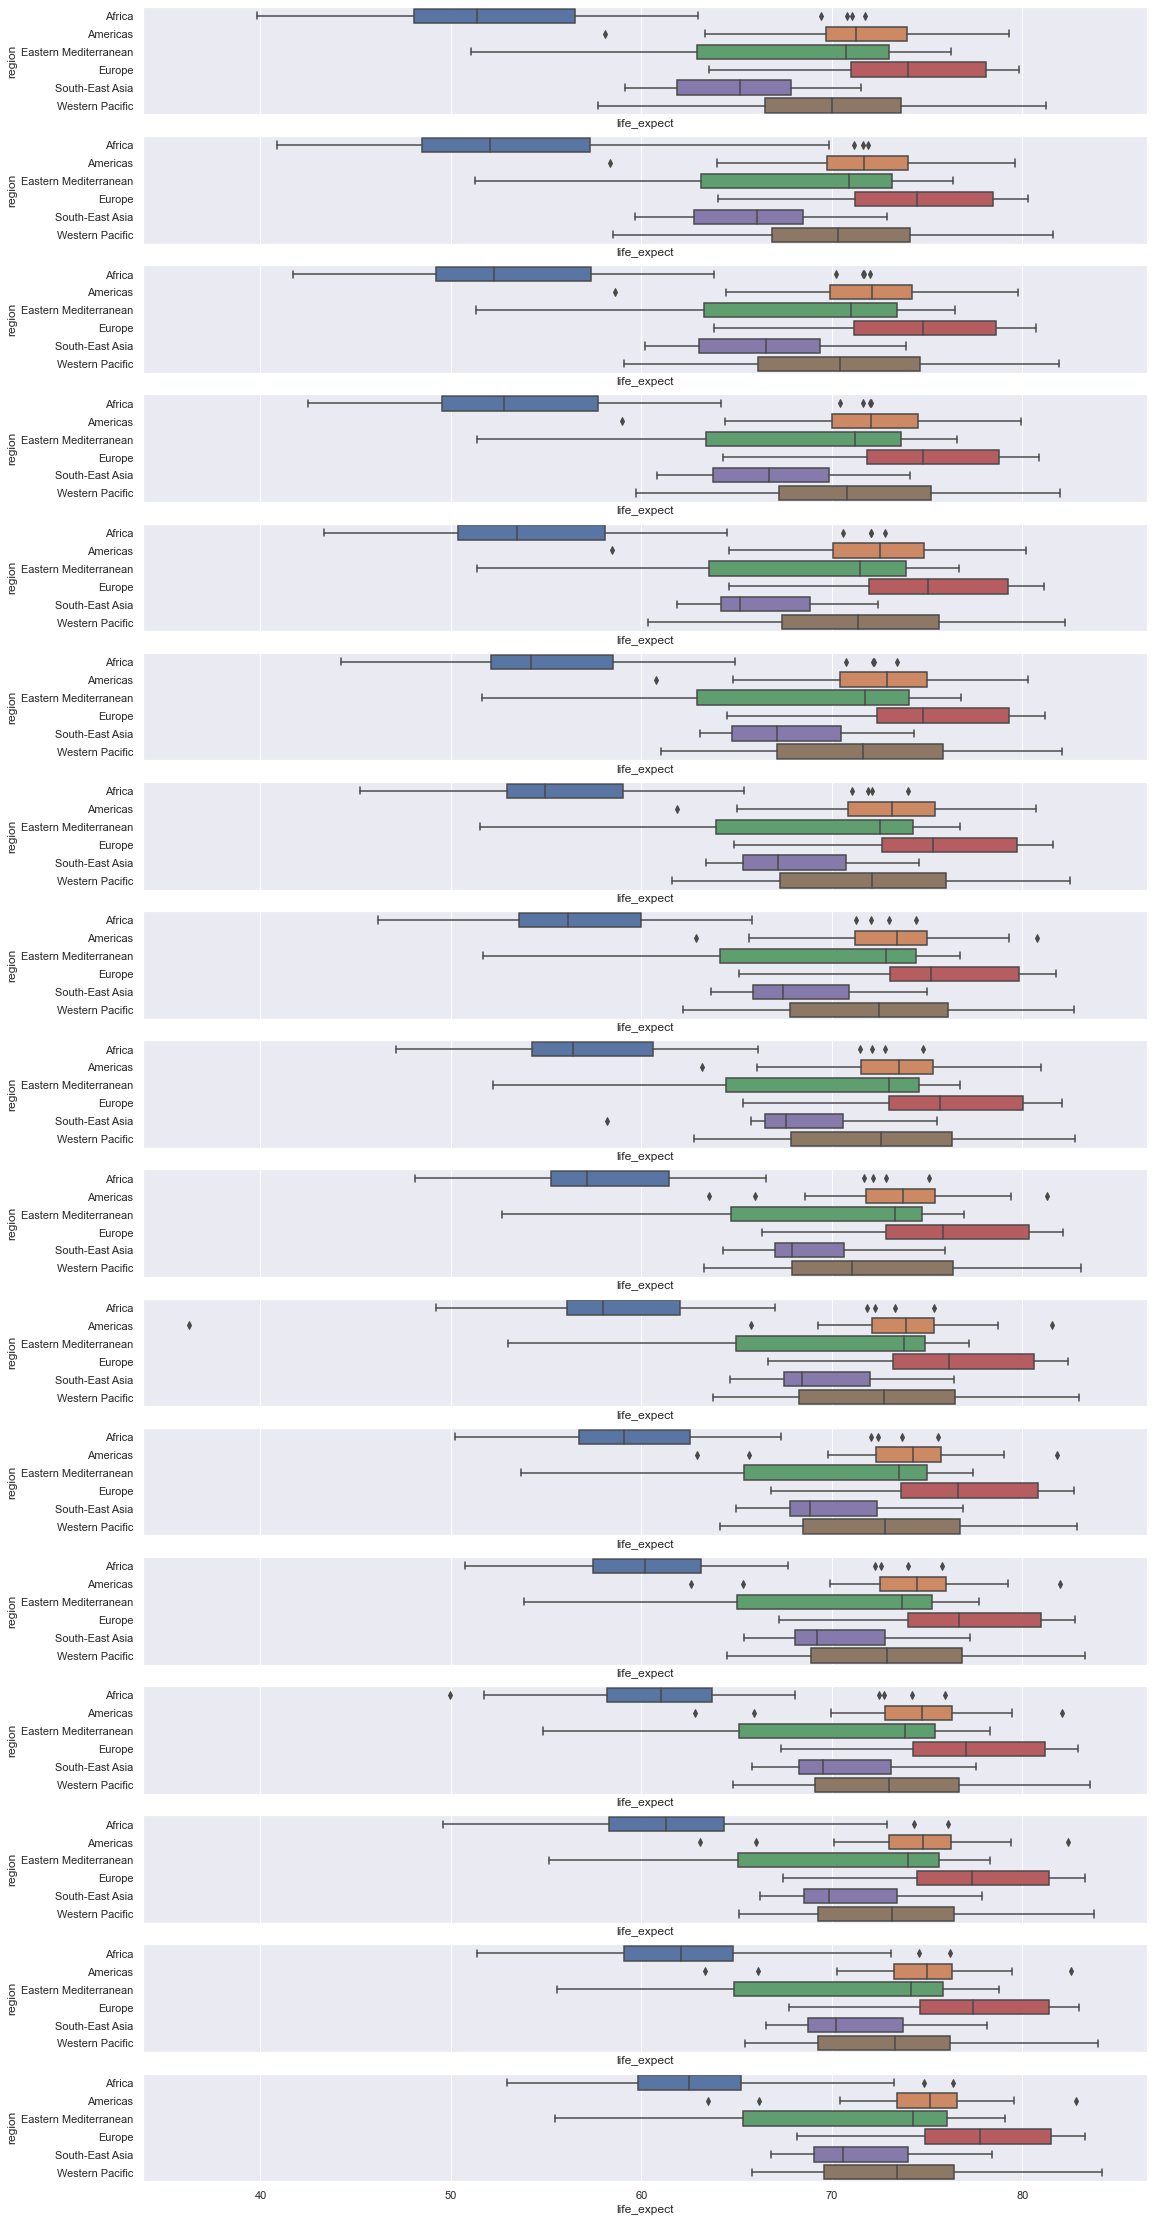

In [135]:
f,axes = plt.subplots(17,1, figsize=(18, 40), sharex=True)

count = 0
year=2000
while count<17:
    tempDF = pd.DataFrame()
    tempDF['region']= regionDF['region']
    tempDF['life_expect'] = regionDF['life_expect']
    tempDF['year'] = regionDF['year']
    to_drop = tempDF[tempDF['year']!=year].index
    tempDF.drop(to_drop, inplace = True)
    sb.boxplot(x = "life_expect", y = "region", data = tempDF, orient = "h", ax=axes[count])
    count += 1
    year+=1



Insights: 
Distributions of life expectancy is distinct for each region as observed in the box-plot from 2000-2016.
From 2000-2016, the median life expectancy at birth for countries in Africa is significantly lower than other regions. 
Life expectancy has generally improved throughout the years as evidenced by the increasing median, higher concentration of data at higher life expectancy levels and a higher minimum life expectancy.

There is an an increase in median life expectancy levels from 2000-2016 for countries in Eastern Mediterranean. Distribution of life expectancy across the countries have become more compact and more concentrated at higher life expectancy levels. 

Other regions show relatively stagnant distributions.

# Machine Learning
1) Multi-variate Regression

2) RandomForestRegressor

3) GradientBoostingRegressor

## Preparing and standardising train and test datasets for machine learning

In [136]:
ml_df = pd.DataFrame(df.drop([ 'year', 'country', 'region'], axis=1))

#1)dropping the whole row if any null - ensure same number of data for each predictor
clean_ml_df = ml_df.dropna()
clean_ml_df



life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
4        51.52863    15.56860         0.333871          0.115700   
9        57.29004    16.48146         0.281049          0.084800   
17       51.43743    15.71862         0.369974          0.103510   
18       52.03133    15.77446         0.365476          0.100855   
19       52.27760    15.80661         0.369024          0.097855   
...           ...         ...              ...               ...   
3106     64.49448    16.57977         0.209267          0.055840   
3107     64.79716    16.64219         0.205146          0.055350   
3108     65.10757    16.70787         0.200820          0.054585   
3109     65.45008    16.77074         0.196661          0.053465   
3110     65.79089    16.83024         0.192794          0.051895   

      age1-4_mort_rate  alcohol   bmi  age5-19thinness  age5-19obesity  \
4             0.020545  2.41274  22.2             10.3             0.8   
9             0.013310  6.11778  22.7              9.4             1.3   
17            0.017145  7.17131  20.6              9.1             0.3   
18            0.016470  6.62197  20.7              8.9             0.4   
19            0.015735  6.51436  20.8              8.8             0.4   
...                ...      ...   ...              ...             ...   
3106          0.004845  6.29833  22.4              9.2             3.1   
3107          0.004600  6.42186  22.6              9.1             3.5   
3108          0.004405  6.64447  22.7              9.0             3.8   
3109          0.004160  6.83826  22.8              8.9             4.2   
3110          0.003990  7.11148  22.9              8.9             4.7   

      hepatitis  measles  polio  diphtheria  basic_water  doctors  gni_capita  \
4          43.0     43.0   18.0        47.0     45.35134    0.621      3080.0   
9          47.0     46.0   36.0        50.0     49.57516    1.313      6200.0   
17         83.0     72.0   71.0        80.0     50.66312    0.280       580.0   
18         83.0     73.0   72.0        81.0     51.23447    0.280       580.0   
19         83.0     75.0   74.0        81.0     51.80933    0.280       590.0   
...         ...      ...    ...         ...          ...      ...         ...   
3106       79.0     72.0   78.0        79.0     72.07056    1.800      4170.0   
3107       87.0     82.0   86.0        87.0     74.05544    4.493      4570.0   
3108       88.0     87.0   88.0        88.0     76.02924    4.949      4570.0   
3109       81.0     83.0   80.0        81.0     77.99142    4.949      4570.0   
3110       66.0     66.0   66.0        66.0     79.94190    4.949      4570.0   

       gghe-d  che_gdp    une_pop  une_hiv  
4     1.68663  3.96720  18758.145      1.3  
9     2.60046  3.84261  22514.281      1.7  
17    1.46507  6.17697   6378.871      3.3  
18    1.69244  6.40484   6525.545      3.1  
19    1.53550  6.47216   6704.113      2.8  
...       ...      ...        ...      ...  
3106  0.43670  2.07638   6444.530      0.3  
3107  0.71266  2.39985   6541.304      0.3  
3108  0.68373  2.29846   6639.756      0.3  
3109  0.86391  2.45366   6741.164      0.3  
3110  0.76495  2.36087   6845.846      0.3  

[1455 rows x 20 columns]

Insights:
Will take life_expect and life_exp60 as response variables for machine learning and compare to see if there is any difference

Obvious that life_exp60 will be most highly correlated with life_expect (maybe EDA will show the same result also need check) + both have similar derivations

In [137]:
#creating Train and Test datasets for Regression
from sklearn.model_selection import train_test_split

y_le = pd.DataFrame(clean_ml_df['life_expect'])
y_le60 = pd.DataFrame(clean_ml_df['life_exp60'])
X = pd.DataFrame(clean_ml_df.drop(['life_expect', 'life_exp60'], axis=1))

#ensuring same splits for comparison after machine learning
X_train, X_test, y_train_le, y_test_le = train_test_split(X, y_le, test_size = 0.25, random_state = 0)
X_train, X_test, y_train_le60, y_test_le60 = train_test_split(X, y_le60, test_size = 0.25, random_state = 0)

print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 18)
Test Set for y=life_expect: (364, 1) (364, 18)

Train Set for y=life_exp60: (1091, 1) (1091, 18)
Test Set for y=life_exp60: (364, 1) (364, 18)


## Model 1: Multi-Variate Regression
https://blog.minitab.com/en/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables
https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

### Analysing response = life_expect dataset

In [138]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train_le) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [86.97123109]



Predictors  Coefficients
2   age1-4_mort_rate -2.960525e+02
1   infant_mort_rate -6.752415e+01
0    adult_mort_rate -4.440309e+01
4                bmi -4.108385e-01
14            gghe-d  3.406579e-01
6     age5-19obesity  1.791326e-01
15           che_gdp  6.428365e-02
5    age5-19thinness -5.750305e-02
17           une_hiv  5.492751e-02
3            alcohol  5.058465e-02
11       basic_water  3.009308e-02
10        diphtheria -2.728743e-02
8            measles  2.047929e-02
7          hepatitis -6.079847e-03
9              polio  3.893022e-03
12           doctors -9.406183e-04
13        gni_capita  7.059026e-06
16           une_pop -9.796129e-07

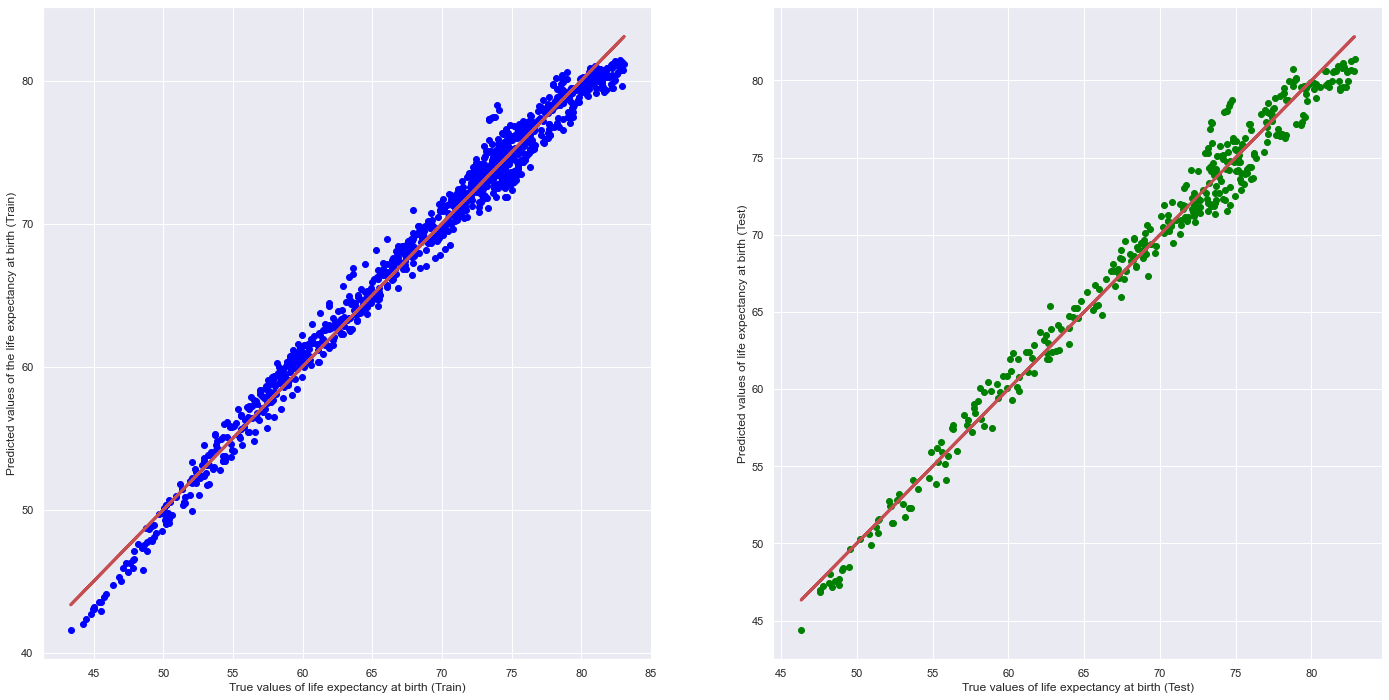

In [139]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of the life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()



In [140]:
from sklearn.metrics import mean_squared_error

print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9851732319029329
Mean Squared Error (MSE) 	: 1.2702526542638424

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9806057180492233
Mean Squared Error (MSE) 	: 1.6219049743566478



### Analysing response = life_exp60 dataset

In [141]:


linreg = LinearRegression()
linreg.fit(X_train, y_train_le60) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [33.15403197]



Predictors  Coefficients
2   age1-4_mort_rate -3.967966e+01
0    adult_mort_rate -1.447143e+01
1   infant_mort_rate -8.277555e+00
4                bmi -5.627833e-01
14            gghe-d  4.046364e-01
6     age5-19obesity  2.144973e-01
17           une_hiv  1.074838e-01
5    age5-19thinness -9.457784e-02
15           che_gdp  5.215257e-02
3            alcohol  2.760733e-02
12           doctors -2.232542e-02
10        diphtheria -2.177242e-02
11       basic_water  2.037573e-02
8            measles  2.021733e-02
7          hepatitis -6.974727e-03
9              polio -1.938536e-03
13        gni_capita -1.160628e-06
16           une_pop  2.963665e-07

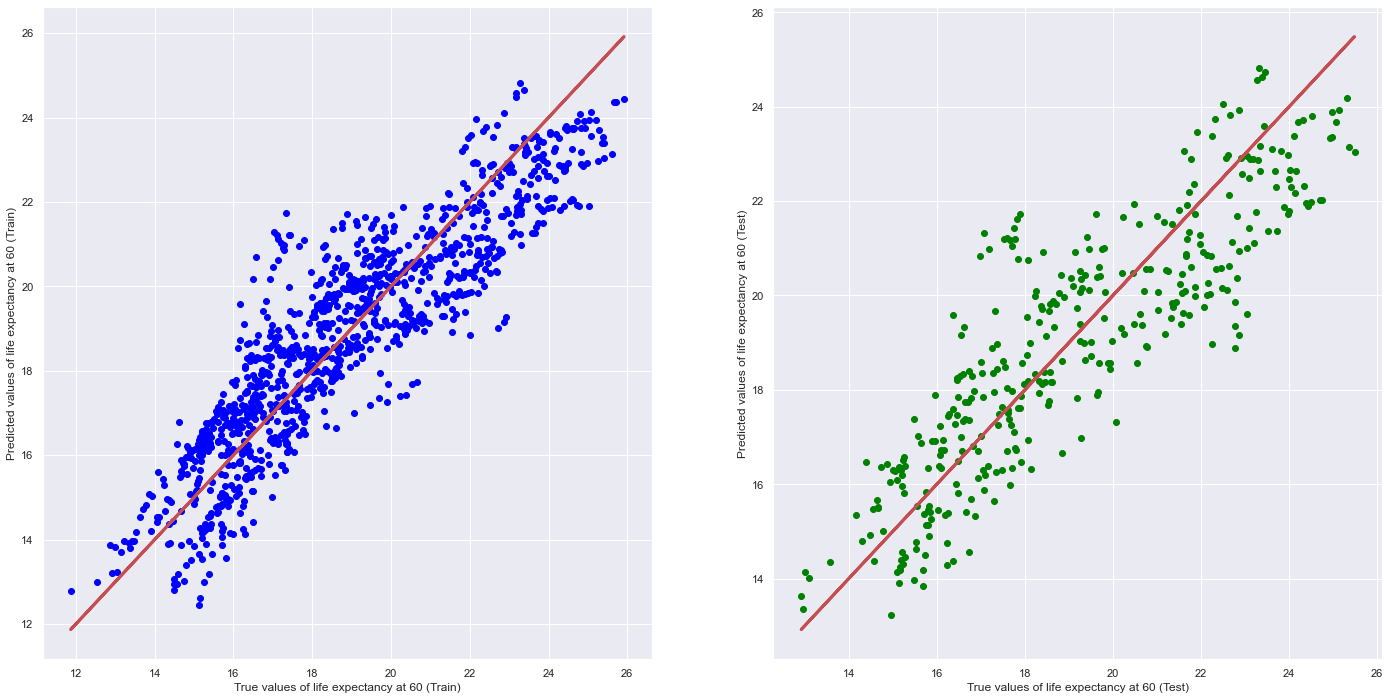

----------For Response = life_exp60----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8038527861916556
Mean Squared Error (MSE) 	: 1.6785358440865312

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7587609823351831
Mean Squared Error (MSE) 	: 2.2087642539630186



In [142]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()


print("----------For Response = life_exp60----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

### Analysing with only top 3 predictors

In [143]:
y = pd.DataFrame(clean_ml_df['life_expect'])
X = pd.DataFrame(clean_ml_df[['age1-4_mort_rate','adult_mort_rate','infant_mort_rate']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

linreg = LinearRegression()  
linreg.fit(X_train, y_train) 

print()
print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key=abs)

Train Set : (1091, 1) (1091, 3)
Test Set  : (364, 1) (364, 3)

Intercept of Regression: b =  [82.23140887]



Predictors  Coefficients
0  age1-4_mort_rate   -181.162589
2  infant_mort_rate   -121.999678
1   adult_mort_rate    -43.901281

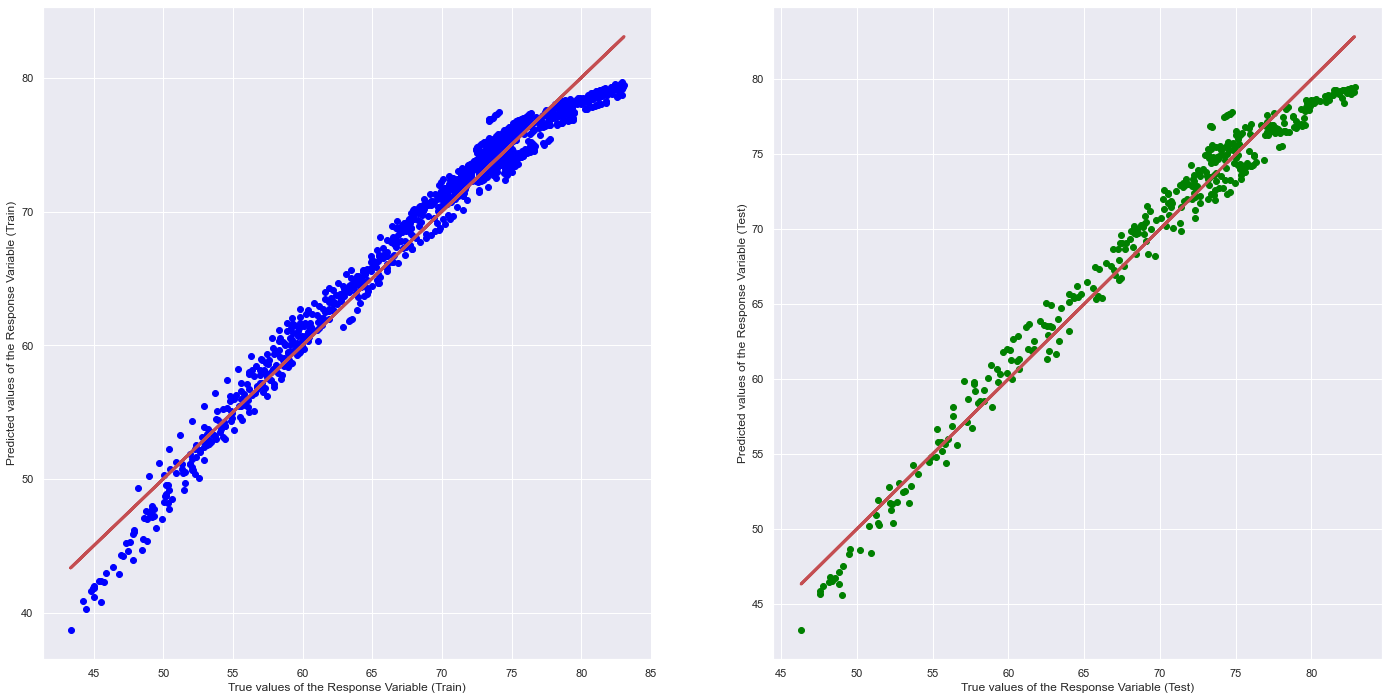

In [144]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [145]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9734505361878258
Mean Squared Error (MSE) 	: 2.2745703349448823

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9709165566671669
Mean Squared Error (MSE) 	: 2.4321901441188682



## Model 2: RandomForestRegressor
# ask about getting coefficient of parameters

### Analysing response = life_expect dataset

In [146]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

RandomForestRegressor(max_depth=9, n_estimators=600, random_state=0)
0.9898208705333221


In [147]:
#using best hyperparameter

rfr = RandomForestRegressor(n_estimators = 600,  max_depth = 9, random_state=0)     

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train_le['life_expect'].ravel())


RandomForestRegressor(max_depth=9, n_estimators=600, random_state=0)

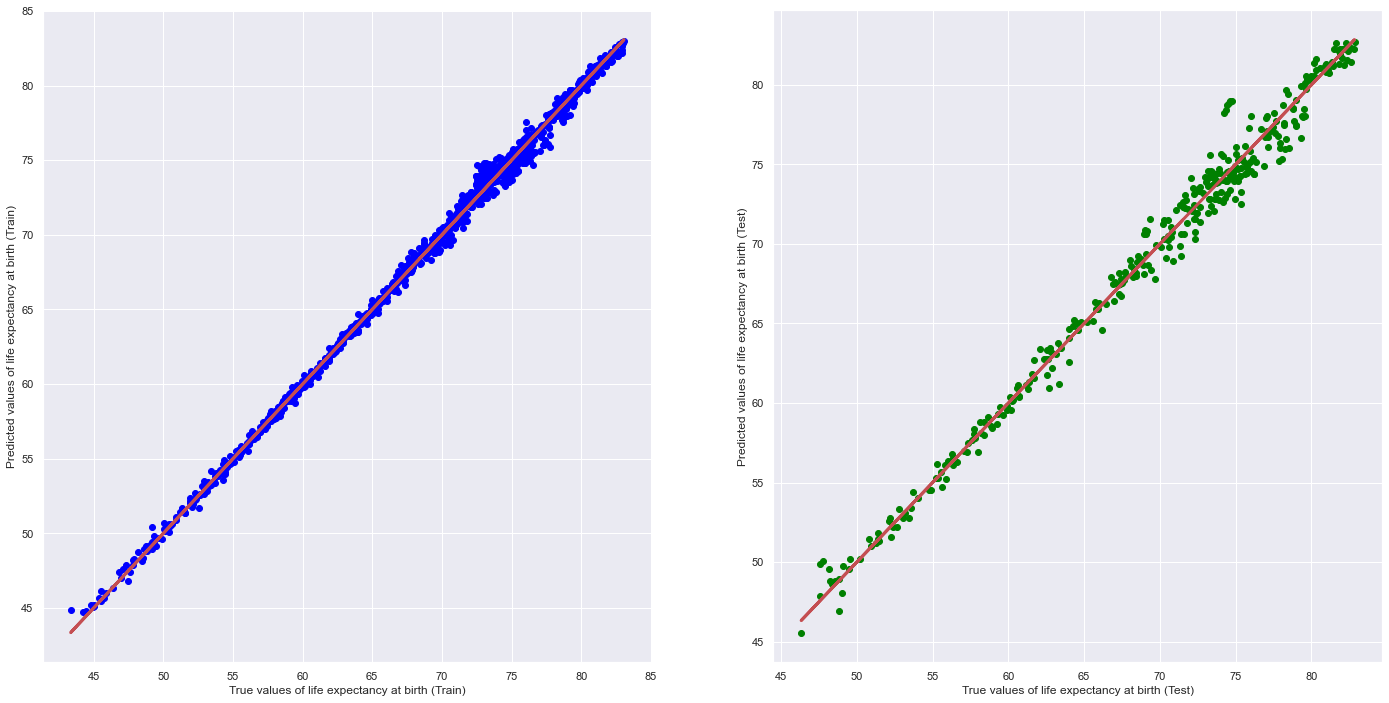

In [148]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [149]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9973025155978361
Mean Squared Error (MSE) 	: 0.23110139035369542

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9867807084621738
Mean Squared Error (MSE) 	: 1.1055028877628716



### Analysing response = life_exp60 dataset

In [150]:
estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))


RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=0)
0.8448998157091326


In [151]:
rfr = RandomForestRegressor(n_estimators = 1000,  max_depth = 8, random_state=0)     

rfr.fit(X_train, y_train_le60['life_exp60'].ravel())

RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=0)

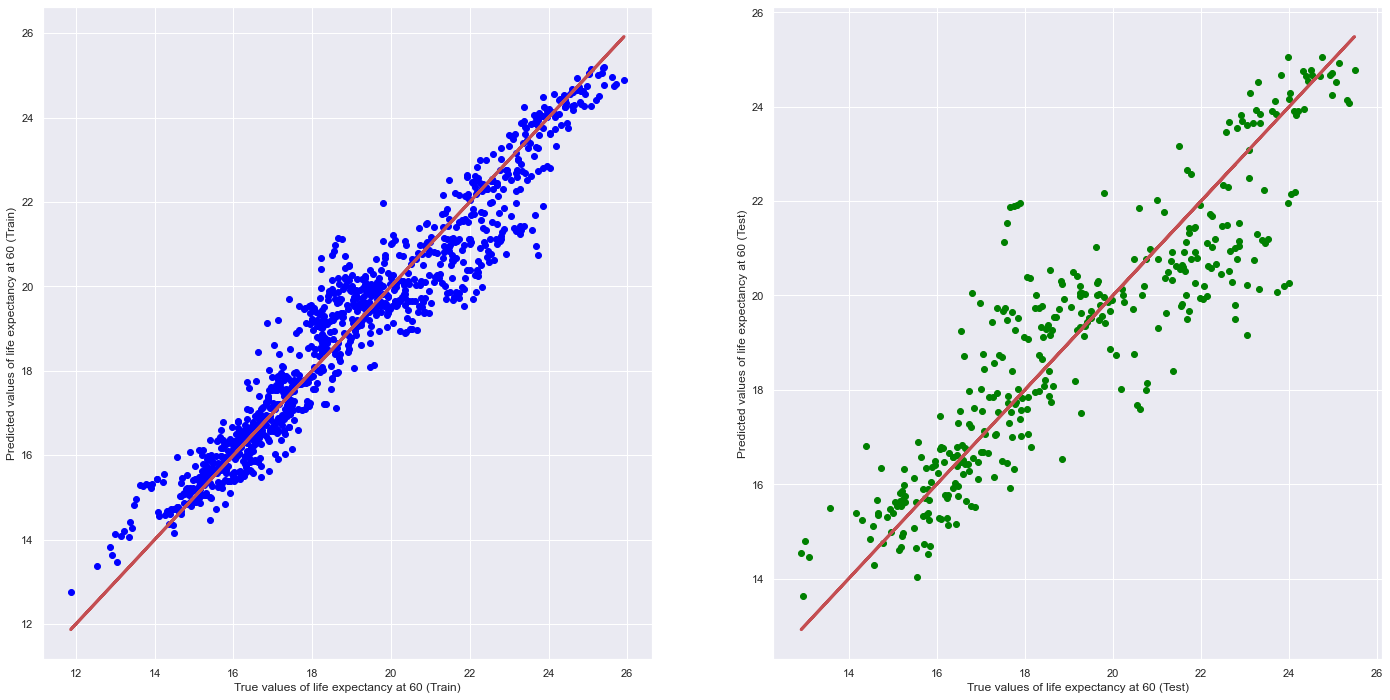

In [152]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [153]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9298998848822264
Mean Squared Error (MSE) 	: 0.5998839015615396

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8122979160411778
Mean Squared Error (MSE) 	: 1.7185845700078748



## Model 3: Gradient Boosting Regressor

### Analysing response = life_expect dataset

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

GradientBoostingRegressor(max_depth=5, n_estimators=70, random_state=0)
0.989287368276304


In [165]:
gbr = GradientBoostingRegressor(n_estimators = 70,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le['life_expect'].ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=70, random_state=0)

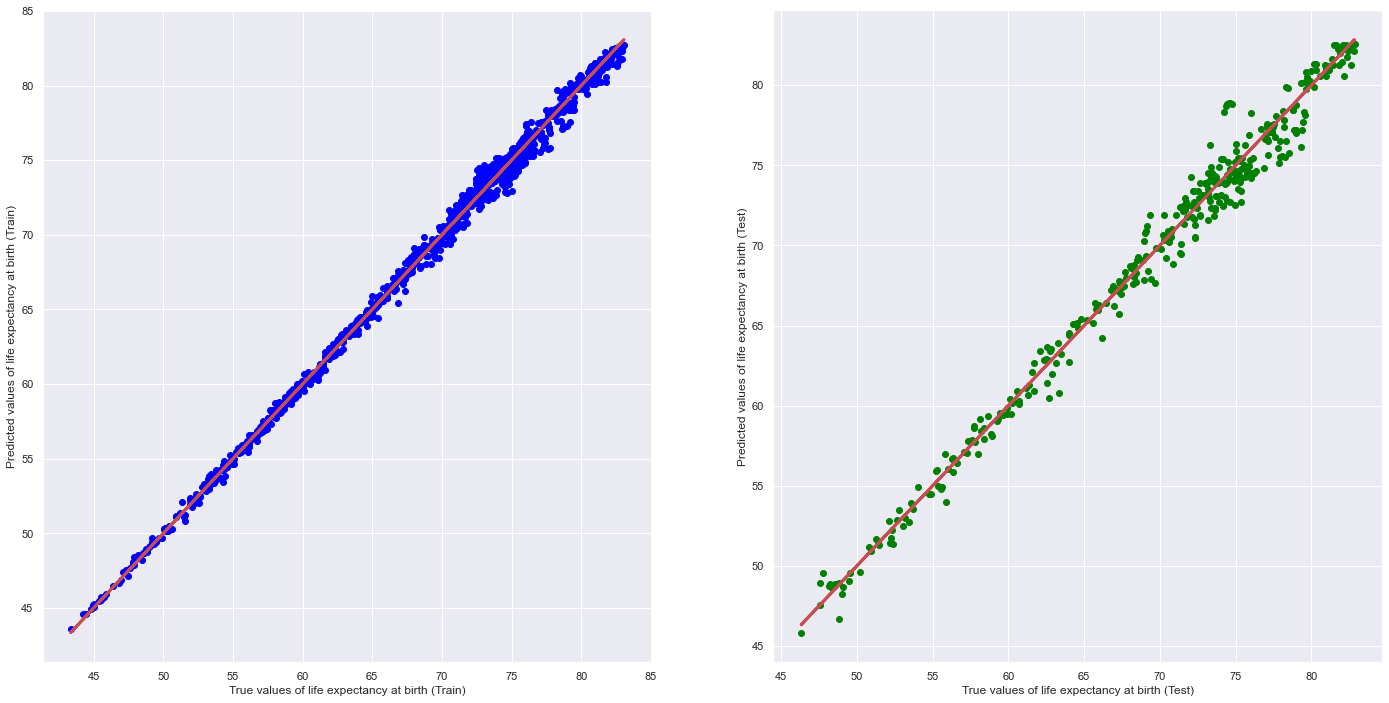

In [166]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [167]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -28.651032651044975
Mean Squared Error (MSE) 	: 0.2785625245803373

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -29.809752382432194
Mean Squared Error (MSE) 	: 1.2634898232288845



### Analysing response = life_exp60 dataset

In [160]:
estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

GradientBoostingRegressor(max_depth=5, n_estimators=30, random_state=0)
0.8343662614787709


In [161]:
gbr = GradientBoostingRegressor(n_estimators = 30,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le60['life_exp60'].ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=30, random_state=0)

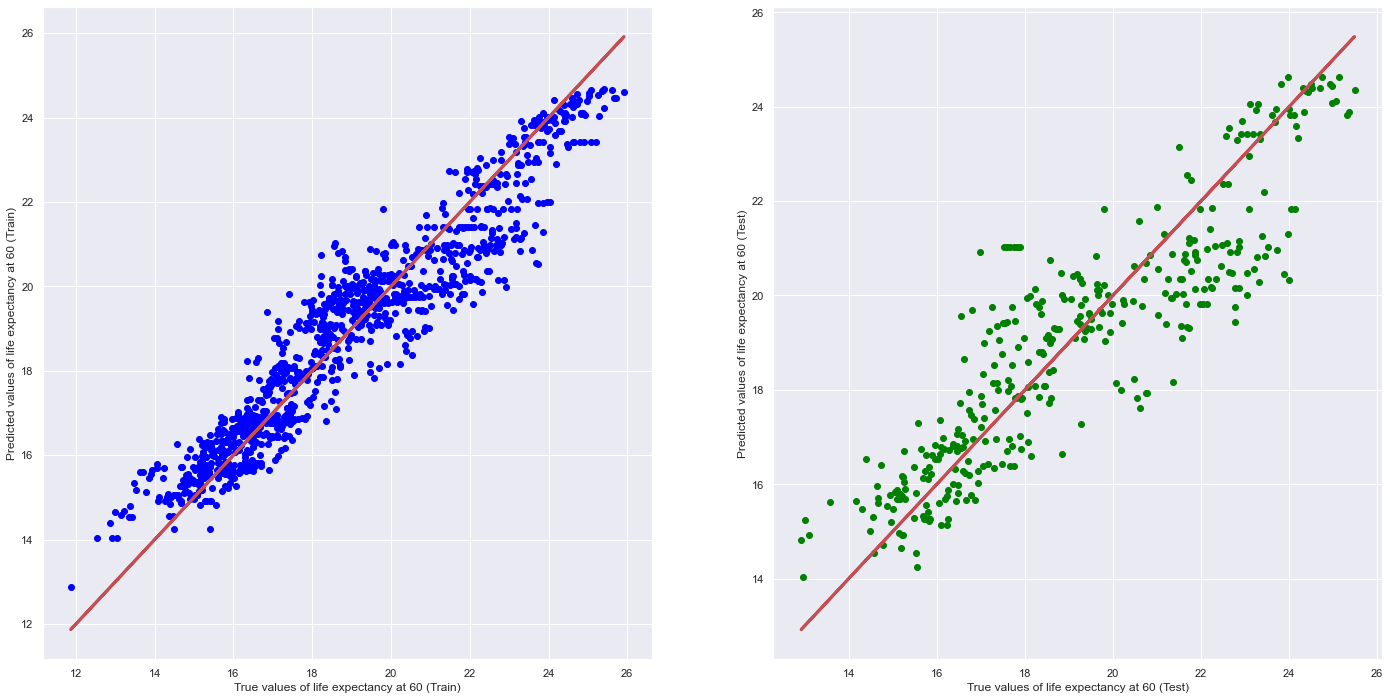

In [162]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [163]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9050557144292838
Mean Squared Error (MSE) 	: 0.8124886580206679

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8046521567981779
Mean Squared Error (MSE) 	: 1.7885885016845071

